# # Resultados de cancer_sv (comparación entre workflows)

In [1]:
outdir = "/home/alejandro/Escritorio/Master/TFM/Resultados"

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import re
import copy
import pickle
import os
import gzip

# Module with helper functions
import sys
sys.path.append(f"{outdir}/../gitlab_tmp/workflow/notebooks/my_modules")
import helper_functions as hf

### Variantes de la referencia somática de COLO829

In [3]:
i_variants_0 = []
with open(f"{outdir}/illumina/ListforNatureReports.IndelsandSNVs.final.Suppl1.snpEff.validated.vcf") as file:
    for line in file:
        if "#" not in line[1]:
            if "#" in line[0]:
                i_variants_0.append(line[1:].strip().split())
            else:
#               if (line.strip().split()[6] == "PASS") and ("INDEL" in line.strip().split()[7]):
                if "INDEL" in line.strip().split()[7]:
                    variant = line.strip().split()
                    variant[1] = int(variant[1])
                    i_variants_0.append(variant)
                
i_variants_0_df = pd.DataFrame(i_variants_0[1:], columns = i_variants_0[0])
i_variants_0_df.CHROM = "chr" + i_variants_0_df.CHROM
i_variants_0_df.sort_values(by = [i_variants_0_df.columns[0], i_variants_0_df.columns[1]], inplace = True)
i_variants_0_df

CHROM        POS           ID       REF  ALT QUAL FILTER  \
0    chr1    1977024            .         C   CT    .   PASS   
1    chr1   27523283            .        CG    C    .   PASS   
2    chr1  106219874            .         A   AC    .   PASS   
3    chr1  119183537            .  CACAAAAA    C    .   PASS   
4    chr1  120663139            .        CG    C    .      .   
..    ...        ...          ...       ...  ...  ...    ...   
419  chrX  112581038  rs199593096         C   CT    .      .   
420  chrX  113798534            .     AAAAC    A    .   PASS   
421  chrX  132628700            .         T  TTC    .   PASS   
422  chrX  134781634            .        AC    A    .   PASS   
423  chrX  137473115            .         G   GT    .   PASS   

                                                  INFO           FORMAT  \
0    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
1    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
2    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
3    TYPE=INDEL;GROWTHS_COUNT=3;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
4    TYPE=INDEL;GROWTHS_COUNT=2;GROWTHS=TGEN;GROWTH...  GT:AD:DP:MIN_DP   
..                                                 ...              ...   
419  TYPE=INDEL;GROWTHS_COUNT=1;GROWTHS=TGEN;EFF=IN...  GT:AD:DP:MIN_DP   
420  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
421  TYPE=INDEL;GROWTHS_COUNT=3;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
422  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
423  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   

    COLO_829BL_llumina COLO_829BL_EPleasance COLO_829BL_TGEN   COLO_829BL_GSC  \
0          ./.:.:73:73           ./.:.:58:58     ./.:.:64:64      ./.:.:59:59   
1          ./.:.:75:75           ./.:.:29:29     ./.:.:64:64      ./.:.:48:48   
2          ./.:.:82:82           ./.:.:33:33     ./.:.:84:84    ./.:.:108:108   
3          ./.:.:75:75             ./.:.:7:7     ./.:.:73:73    ./.:.:133:133   
4          ./.:.:23:23           ./.:.:13:13     ./.:.:31:31      ./.:.:56:56   
..                 ...                   ...             ...              ...   
419     ./.:6,9,0:15:.       ./.:1,10,0:11:.     ./.:.:24:24  ./.:20,9,0:29:.   
420        ./.:.:48:48           ./.:.:22:22     ./.:.:25:25      ./.:.:45:45   
421        ./.:.:26:26           ./.:.:13:13     ./.:.:35:35      ./.:.:36:36   
422        ./.:.:58:58           ./.:.:18:18     ./.:.:36:36      ./.:.:61:61   
423        ./.:.:38:38           ./.:.:11:11     ./.:.:35:35      ./.:.:61:61   

    COLO_829_Illumina COLO_829_EPleasance     COLO_829_TGEN      COLO_829_GSC  
0    0/1:17,45,0:62:.     0/1:8,32,0:40:.   1/1:0,39,0:39:.   0/1:7,22,0:29:.  
1    0/1:13,47,0:60:.     0/1:6,14,0:20:.   1/1:0,43,0:43:.  0/1:12,24,0:36:.  
2    0/1:36,34,0:70:.    0/1:19,10,0:29:.  0/1:35,34,0:69:.  0/1:31,28,0:59:.  
3     1/1:0,47,0:47:.      ./.:1,9,0:10:.   1/1:1,44,0:45:.   1/1:0,71,0:71:.  
4       ./.:5,2,0:7:.      ./.:5,6,0:11:.    0/1:7,5,0:12:.  0/1:15,11,0:26:.  
..                ...                 ...               ...               ...  
419   ./.:0,53,0:53:.     ./.:0,22,0:22:.   1/1:0,43,0:43:.   ./.:0,50,0:50:.  
420   1/1:0,75,0:75:.     1/1:0,18,0:18:.   1/1:0,55,0:55:.   1/1:0,48,0:48:.  
421   1/1:0,42,0:42:.     ./.:1,13,0:14:.   1/1:0,39,0:39:.   1/1:3,44,0:47:.  
422   1/1:0,65,0:65:.     1/1:0,22,0:22:.   1/1:0,55,0:55:.   1/1:0,57,0:57:.  
423   1/1:0,48,0:48:.     1/1:0,29,0:29:.   1/1:0,72,0:72:.   1/1:0,88,0:88:.  

[424 rows x 17 columns]

### Reproducción de la referencia somática con BWA (excluyendo variantes en unlocalized/unplaced scaffolds)

In [4]:
i_variants_37_bwa = []
with gzip.open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/results/variants/somatic.indels.vcf.gz",
               "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[1]):
            if "#" in line.decode('utf-8')[0]:
                i_variants_37_bwa.append(line.decode('utf-8')[1:].strip().split())
            else:
                i_variants_37_bwa.append(line.decode('utf-8').strip().split())
                
i_variants_37_bwa_df = pd.DataFrame(i_variants_37_bwa[1:], columns = i_variants_37_bwa[0])
i_variants_37_bwa_df

CHROM      POS ID        REF               ALT QUAL  \
0       NC_000001.10   535542  .    GCCATTT                 G    .   
1       NC_000001.10   535552  .          C  CTTTTATTGAAATAAA    .   
2       NC_000001.10   536609  .          C           CTACCCA    .   
3       NC_000001.10   537424  .         AC                 A    .   
4       NC_000001.10   547009  .        GGT                 G    .   
...              ...      ... ..        ...               ...  ...   
128973   NT_113891.2  1840912  .        TAC                 T    .   
128974   NT_167249.1   107269  .  TATATATGG                 T    .   
128975   NT_167249.1  2729832  .          C               CTA    .   
128976   NT_167251.1   112019  .        ATG                 A    .   
128977   NC_012920.1    12417  .          C                CA    .   

                  FILTER                                               INFO  \
0                 LowEVS  SOMATIC;QSI=27;TQSI=2;NT=ref;QSI_NT=27;TQSI_NT...   
1                 LowEVS  SOMATIC;QSI=15;TQSI=2;NT=ref;QSI_NT=15;TQSI_NT...   
2                 LowEVS  SOMATIC;QSI=22;TQSI=2;NT=ref;QSI_NT=22;TQSI_NT...   
3                 LowEVS  SOMATIC;QSI=6;TQSI=1;NT=ref;QSI_NT=6;TQSI_NT=1...   
4                 LowEVS  SOMATIC;QSI=13;TQSI=1;NT=ref;QSI_NT=13;TQSI_NT...   
...                  ...                                                ...   
128973            LowEVS  SOMATIC;QSI=1;TQSI=2;NT=ref;QSI_NT=1;TQSI_NT=2...   
128974            LowEVS  SOMATIC;QSI=12;TQSI=2;NT=ref;QSI_NT=12;TQSI_NT...   
128975  HighDepth;LowEVS  SOMATIC;QSI=3;TQSI=2;NT=ref;QSI_NT=3;TQSI_NT=2...   
128976            LowEVS  SOMATIC;QSI=1;TQSI=1;NT=hom;QSI_NT=1;TQSI_NT=1...   
128977              PASS  SOMATIC;QSI=3070;TQSI=1;NT=ref;QSI_NT=3070;TQS...   

                                             FORMAT  \
0       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
2       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
3       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
4       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                             ...   
128973  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128974  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128975  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128976  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128977  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                   NORMAL  \
0                56:56:51,84:5,9:2,0:54.45:1.22:0.00:0.02   
1               55:55:48,79:6,11:2,0:56.17:1.19:0.00:0.02   
2              55:55:45,136:4,12:1,1:60.09:0.47:0.00:0.00   
3                28:28:22,52:3,7:4,0:26.57:0.83:0.00:0.00   
4             23:23:19,133:1,21:3,13:22.75:0.37:0.00:0.00   
...                                                   ...   
128973        59:59:46,62:2,3:16,11:58.28:11.84:0.00:0.19   
128974           22:22:21,36:0,4:6,8:25.61:3.44:0.00:0.12   
128975         43:43:31,77:4,12:9,49:39.28:4.45:0.00:0.10   
128976           29:29:0,0:29,35:0,1:26.07:1.85:0.00:0.04   
128977  20074:20074:18104,19235:32,52:1975,1268:20022....   

                                                    TUMOR  
0                 15:15:9,30:6,9:1,0:14.69:0.74:0.00:0.00  
1                 16:16:9,30:6,9:1,1:14.85:0.77:0.00:0.00  
2                    6:6:3,34:2,8:1,1:7.11:0.19:0.00:0.00  
3                16:16:11,20:5,9:0,0:14.26:0.00:0.00:0.00  
4                11:11:7,54:3,24:1,7:11.00:0.79:0.00:0.00  
...                                                   ...  
128973        76:76:54,66:5,8:20,17:67.96:11.27:0.00:0.16  
128974          25:25:23,40:4,8:7,21:31.23:2.63:0.00:0.06  
128975        53:53:35,81:7,22:13,63:47.27:6.38:0.00:0.13  
128976           14:14:2,3:12,16:0,0:12.09:0.85:0.00:0.00  
128977  12970:12970:8547,9088:2631,2817:1789,1275:1295...  

[128978 rows x 11 columns]

In [5]:
i_variants_37_bwa_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                             i_variants_37_bwa_df,
                                             unlocalized = True,
                                             remove = True)
i_variants_37_bwa_df_mod

CHROM       POS ID          REF    ALT QUAL            FILTER  \
128862  chr1      4357  .            G  GAGAA    .            LowEVS   
128852  chr1      5952  .            T     TG    .            LowEVS   
128675  chr1      6765  .            T     TG    .  HighDepth;LowEVS   
128853  chr1      8016  .        GATTT      G    .            LowEVS   
128854  chr1      8282  .  CTCTTTCTCTT      C    .            LowEVS   
...      ...       ... ..          ...    ...  ...               ...   
128605  chrY  59002610  .            A     AG    .            LowEVS   
128606  chrY  59009151  .            G     GA    .            LowEVS   
128607  chrY  59024400  .            G    GCA    .  HighDepth;LowEVS   
128608  chrY  59027141  .           TA      T    .            LowEVS   
128609  chrY  59030585  .            T    TAA    .  HighDepth;LowEVS   

                                                     INFO  \
128862  SOMATIC;QSI=203;TQSI=1;NT=het;QSI_NT=3070;TQSI...   
128852  SOMATIC;QSI=93;TQSI=1;NT=het;QSI_NT=93;TQSI_NT...   
128675  SOMATIC;QSI=201;TQSI=1;NT=conflict;QSI_NT=0;TQ...   
128853  SOMATIC;QSI=46;TQSI=1;NT=het;QSI_NT=46;TQSI_NT...   
128854  SOMATIC;QSI=297;TQSI=1;NT=het;QSI_NT=3070;TQSI...   
...                                                   ...   
128605  SOMATIC;QSI=26;TQSI=1;NT=het;QSI_NT=26;TQSI_NT...   
128606  SOMATIC;QSI=7;TQSI=1;NT=het;QSI_NT=7;TQSI_NT=1...   
128607  SOMATIC;QSI=11;TQSI=2;NT=het;QSI_NT=11;TQSI_NT...   
128608  SOMATIC;QSI=76;TQSI=1;NT=het;QSI_NT=76;TQSI_NT...   
128609  SOMATIC;QSI=10;TQSI=2;NT=ref;QSI_NT=10;TQSI_NT...   

                                             FORMAT  \
128862  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128852  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128675  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128853  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128854  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                             ...   
128605  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128606  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128607  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128608  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128609  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                   NORMAL  \
128862    156:156:58,62:76,77:22,23:142.83:4.14:0.00:0.03   
128852        91:91:52,57:31,36:10,1:91.31:7.83:0.00:0.08   
128675  328:328:272,428:27,177:29,49:518.37:19.25:0.00...   
128853      131:131:95,98:34,37:6,4:119.43:4.17:0.00:0.03   
128854    153:153:67,74:70,73:18,14:140.68:2.58:0.00:0.01   
...                                                   ...   
128605    112:112:66,68:44,120:5,2:207.17:15.96:0.00:0.07   
128606   107:107:44,53:26,91:40,21:165.72:31.55:0.00:0.19   
128607  229:229:78,123:111,167:111,113:284.38:30.82:0....   
128608      93:93:47,51:30,70:10,12:109.12:4.83:0.00:0.04   
128609  297:297:254,351:6,12:79,34:314.80:45.15:0.00:0.14   

                                                    TUMOR  
128862    167:167:0,0:138,143:36,39:161.01:5.38:0.00:0.03  
128852      108:108:91,101:0,1:16,8:106.82:6.39:0.00:0.06  
128675     80:80:0,1:19,208:58,117:367.97:16.64:0.00:0.04  
128853    147:147:137,146:0,0:20,13:133.56:4.92:0.00:0.03  
128854    187:187:172,182:0,0:26,21:175.29:3.89:0.00:0.02  
...                                                   ...  
128605      65:65:1,1:39,132:19,29:159.46:23.58:0.00:0.14  
128606       65:65:0,1:26,83:43,26:143.55:29.97:0.00:0.20  
128607  178:178:23,56:102,151:109,116:232.54:23.56:0.0...  
128608         60:60:0,0:49,94:11,16:69.32:2.73:0.00:0.03  
128609  266:266:194,287:14,26:100,66:279.25:53.48:0.00...  

[128919 rows x 11 columns]

In [6]:
i_variants_37_bwa_f_df = i_variants_37_bwa_df.iloc[list((i_variants_37_bwa_df.FILTER == "PASS") |
                                                        (i_variants_37_bwa_df.FILTER.str.contains("HighDepth")))]
i_variants_37_bwa_f_df = i_variants_37_bwa_f_df.iloc[list(i_variants_37_bwa_f_df.FILTER.str.contains("LowDepth") == False)]
i_variants_37_bwa_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                               i_variants_37_bwa_f_df,
                                               unlocalized = True,
                                               remove = True)
i_variants_37_bwa_f_df_mod

CHROM       POS ID     REF  ALT QUAL            FILTER  \
1385  chr1      6765  .       T   TG    .  HighDepth;LowEVS   
1386  chr1    127378  .    CTCA    C    .              PASS   
1387  chr1    127434  .    CTCA    C    .              PASS   
1388  chr1    129147  .       A   AT    .              PASS   
1389  chr1    130075  .   CATTT    C    .              PASS   
...    ...       ... ..     ...  ...  ...               ...   
1378  chrY  28810857  .  ATAGAG    A    .  HighDepth;LowEVS   
1379  chrY  28812939  .       G   GT    .  HighDepth;LowEVS   
1380  chrY  58996106  .      AC    A    .  HighDepth;LowEVS   
1381  chrY  59024400  .       G  GCA    .  HighDepth;LowEVS   
1382  chrY  59030585  .       T  TAA    .  HighDepth;LowEVS   

                                                   INFO  \
1385  SOMATIC;QSI=201;TQSI=1;NT=conflict;QSI_NT=0;TQ...   
1386  SOMATIC;QSI=82;TQSI=1;NT=ref;QSI_NT=82;TQSI_NT...   
1387  SOMATIC;QSI=56;TQSI=2;NT=ref;QSI_NT=56;TQSI_NT...   
1388  SOMATIC;QSI=61;TQSI=1;NT=ref;QSI_NT=61;TQSI_NT...   
1389  SOMATIC;QSI=54;TQSI=1;NT=ref;QSI_NT=54;TQSI_NT...   
...                                                 ...   
1378  SOMATIC;QSI=9;TQSI=2;NT=ref;QSI_NT=9;TQSI_NT=2...   
1379  SOMATIC;QSI=27;TQSI=1;NT=ref;QSI_NT=27;TQSI_NT...   
1380  SOMATIC;QSI=12;TQSI=1;NT=het;QSI_NT=12;TQSI_NT...   
1381  SOMATIC;QSI=11;TQSI=2;NT=het;QSI_NT=11;TQSI_NT...   
1382  SOMATIC;QSI=10;TQSI=2;NT=ref;QSI_NT=10;TQSI_NT...   

                                           FORMAT  \
1385  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1386  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1387  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1388  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1389  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                           ...   
1378  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1379  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1380  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1381  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1382  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                 NORMAL  \
1385  328:328:272,428:27,177:29,49:518.37:19.25:0.00...   
1386     104:104:82,230:7,22:12,20:97.37:7.45:0.00:0.07   
1387       70:70:52,158:3,18:15,22:71.95:7.45:0.00:0.10   
1388           61:61:53,85:3,5:5,3:62.34:2.56:0.00:0.03   
1389           55:55:51,82:4,6:2,0:61.74:0.79:0.00:0.00   
...                                                 ...   
1378  329:329:206,473:17,52:139,83:325.43:79.96:0.00...   
1379  359:359:272,498:7,21:90,347:397.98:77.88:0.00:...   
1380  207:207:78,105:103,115:24,45:222.66:24.76:0.00...   
1381  229:229:78,123:111,167:111,113:284.38:30.82:0....   
1382  297:297:254,351:6,12:79,34:314.80:45.15:0.00:0.14   

                                                  TUMOR  
1385     80:80:0,1:19,208:58,117:367.97:16.64:0.00:0.04  
1386      59:59:28,114:21,57:10,15:57.16:4.38:0.00:0.07  
1387       40:40:16,76:11,33:12,15:41.98:6.96:0.00:0.15  
1388          23:23:12,22:9,17:2,5:21.39:1.28:0.00:0.05  
1389          26:26:15,31:9,14:4,4:33.43:0.64:0.00:0.00  
...                                                 ...  
1378               3:3:0,0:0,0:4,37:2.66:2.66:0.00:1.00  
1379              4:4:0,2:0,0:6,301:5.71:4.43:0.00:0.80  
1380  188:188:39,52:116,132:31,42:200.82:28.60:0.00:...  
1381  178:178:23,56:102,151:109,116:232.54:23.56:0.0...  
1382  266:266:194,287:14,26:100,66:279.25:53.48:0.00...  

[1411 rows x 11 columns]

### Variantes resultantes del workflow de Nanopore (excluyendo unlocalized/unplaced scaffolds, STRANDBIAS y BND)

In [7]:
n_variants_37 = []
with open(f"{outdir}/nanopore/sniffles_res/nanopore_ERR2752452_37_SV_calling.vcf") as file:
    for line in file:
        if "#" not in line[1]:
            if "#" in line[0]:
                n_variants_37.append(line[1:].strip().split())
            elif "STRANDBIAS" in line.strip().split()[0]:
                var = [line.strip().split()[0]]
                var.append("-")
                var.extend(line.strip().split()[1:])
                n_variants_37.append(var)
            else:
                n_variants_37.append(line.strip().split())
                
n_variants_37_df = pd.DataFrame(n_variants_37[1:], columns = n_variants_37[0])
n_variants_37_df

CHROM       POS     ID  \
0               NC_000001.10     10882      0   
1               NC_000001.10     54714      1   
2               NC_000001.10     66482      2   
3               NC_000001.10    227712      3   
4               NC_000001.10    445242      4   
...                      ...       ...    ...   
36385            NC_000016.9  33965597  36385   
36386            NC_000016.9  33971099  36386   
36387  NC_000017.1STRANDBIAS         -  36387   
36388  NC_000019.9STRANDBIAS         -  36388   
36389            NT_167209.1         2  36389   

                                         REF  \
0                                          N   
1      TTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTC   
2                                          N   
3                                          N   
4                                          N   
...                                      ...   
36385                                      N   
36386                                      N   
36387                                      N   
36388                                      N   
36389                                      N   

                                                     ALT QUAL FILTER  \
0              TGGAAGGCCCAGGAGGAGGCGTGGCACAGGCCATAGACACA    .   PASS   
1                                                      N    .   PASS   
2      TATAGAATATAATATATATTTTATTATAAAATATATATAGAGATAT...    .   PASS   
3      CTATGTATTGTCTGTAATCCAGTCATTAGATGTCTACAATTAAATC...    .   PASS   
4      GAGGAGAAAGAGGGGGATATAGAGAGAGAAAGGAGGGGGCTAGAGA...    .   PASS   
...                                                  ...  ...    ...   
36385                               ]NT_167223.1:16504]N    .   PASS   
36386                            ]NC_000021.8:10707432]N    .   PASS   
36387                              ]NT_167214.1:161803]N    .   PASS   
36388                             N[NC_000024.9:9960180[    .   PASS   
36389                               ]NT_167239.1:36653]N    .   PASS   

                                                    INFO    FORMAT  \
0      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
1      PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00000...  GT:DR:DV   
2      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
3      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
4      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
...                                                  ...       ...   
36385  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16722...  GT:DR:DV   
36386  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
36387  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16721...  GT:DR:DV   
36388  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
36389  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16723...  GT:DR:DV   

      /storage/scratch01/users/amartinm/TFM/nanopore/sorted_bam/nanopore_ERR2752452_37_sorted.bam  
0                                              0/0:61:25                                           
1                                              0/1:21:18                                           
2                                              0/1:18:15                                           
3                                             0/0:149:40                                           
4                                              0/1:15:11                                           
...                                                  ...                                           
36385                                         0/0:572:16                                           
36386                                        0/0:2692:13                                           
36387                                          0/1:65:63                                           
36388                                         0/0:322:15                                           
36389                                           1/1

In [8]:
n_variants_37_f_df = n_variants_37_df.iloc[list((n_variants_37_df.CHROM.str.contains("STRANDBIAS") == False) &
                                                (n_variants_37_df.INFO.str.contains("BND") == False))]
n_variants_37_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                           n_variants_37_f_df,
                                           unlocalized = True,
                                           remove = True)
n_variants_37_f_df_mod

CHROM       POS     ID                                     REF  \
32758  chr1         2  35258                                       N   
32759  chr1         6  35259                                       N   
32760  chr1       300  35260                                       N   
32761  chr1       807  35261                                       N   
32762  chr1      2130  35264                                       N   
...     ...       ...    ...                                     ...   
31913  chrY  59007207  34216                                       N   
31914  chrY  59013742  34217                                       N   
31915  chrY  59017779  34218                                       N   
31916  chrY  59022272  34219  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA   
31917  chrY  59034251  34220                                       N   

                                                     ALT QUAL FILTER  \
32758                                              <DUP>    .   PASS   
32759                                              <INV>    .   PASS   
32760  GTAATCATCATCAATGGAATTAAAAAATAACCATCATCAATTGGTA...    .   PASS   
32761    GAATCGAATGGATCATCAAATGGAATCAGATGGAATCATCATCAAAT    .   PASS   
32762  ACTCCGAATGCATCATCAATGGAATCGAATGAATCATCGGACTTCG...    .   PASS   
...                                                  ...  ...    ...   
31913                    GGACCAAGTTCAAAATTAACCACATATAGAC    .   PASS   
31914  CCTGCTCAGCCTCCCAAGCAATGGGATTACATATAACTCAACAATC...    .   PASS   
31915                    TATATATATATATATATATATATATATATAT    .   PASS   
31916                                                  N    .   PASS   
31917  GGTTTCTTTTTTTTTTTTTTTGAGGCCGAGGAGTCTGAAGCTCCTT...    .   PASS   

                                                    INFO    FORMAT  \
32758  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_00387...  GT:DR:DV   
32759  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_003...  GT:DR:DV   
32760  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_003...  GT:DR:DV   
32761  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_00387...  GT:DR:DV   
32762  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_003...  GT:DR:DV   
...                                                  ...       ...   
31913  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
31914  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
31915  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
31916  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
31917  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   

      /storage/scratch01/users/amartinm/TFM/nanopore/sorted_bam/nanopore_ERR2752452_37_sorted.bam  
32758                                         0/0:183:24                                           
32759                                         0/0:393:10                                           
32760                                         0/0:964:30                                           
32761                                        0/0:1140:16                                           
32762                                        0/0:1365:14                                           
...                                                  ...                                           
31913                                          0/1:64:49                                           
31914                                         1/1:39:272                                           
31915                                          0/1:23:38                                           
31916                                          1/1:16:89                                           
31917                                           1/1:1:12                                           

[32229 rows x 10 columns]

## Intersección de las variantes identificadas con Nanopore con las identificadas por la reproducción con BWA 

In [9]:
found_variants_37_ont_bwa_df, not_found_variants_37_ont_bwa_df = hf.SVs_coincident_counter(n_variants_37_f_df_mod,
                                                                                           i_variants_37_bwa_df_mod,
                                                                                           range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
24 SVs out of the 32229 identified in the work from which the data was obtained.
It means recovering 0.07% of the originaly identified SVs.


In [10]:
for pos in range(len(found_variants_37_ont_bwa_df)):
    var = found_variants_37_ont_bwa_df.iloc[pos]
    df = i_variants_37_bwa_df_mod.iloc[list((i_variants_37_bwa_df_mod.CHROM == var.CHROM) &
                                            (i_variants_37_bwa_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    print(var.to_list())
    print(df.iloc[0].to_list())
    print()

['chr1', 58584237, '787', 'CATATATATATATACATATATATATAAAATAC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=58584282;STD_quant_start=6.522152;STD_quant_stop=8.009610;Kurtosis_quant_start=2.148063;Kurtosis_quant_stop=1.828878;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-45;STRANDS=+-;STRANDS2=11,16,11,16;RE=27;REF_strand=29,27;Strandbias_pval=0.361184;AF=0.325301', 'GT:DR:DV', '0/1:56:27']
['chr1', 58584237, '.', 'CAT', 'C', '.', 'LowEVS', 'SOMATIC;QSI=5;TQSI=2;NT=ref;QSI_NT=5;TQSI_NT=2;SGT=ref->het;MQ=55.66;MQ0=12;RU=AT;RC=6;IC=5;IHP=2;SomaticEVS=2.08', 'DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50', '102:102:95,103:2,6:19,19:99.73:11.39:0.00:0.11', '59:59:52,56:8,11:10,18:60.27:7.63:0.00:0.12']

['chr1', 118516186, '1228', 'GCTTCTGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=118516222;STD_quant_start=0.000000;STD_quant_stop=0.000000;Kurtosis_quant_start=1.150000;Kurtosis_quant_stop=2.000000;SVTYPE=DEL;SUPTYPE

['chr12', 60398423, '22551', 'N', 'TATATATATATAATATATATATTATATATATTTATATATATTATATATATAATATATATATTTATATATATAATATATATATATATATATATAATATATATATTATATATATTAATATATAATATATATTATATATATATAATATATATATTATATATAATATATATA', '.', 'PASS', 'IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000012.11;END=60398422;STD_quant_start=23.164432;STD_quant_stop=28.963927;Kurtosis_quant_start=-1.805873;Kurtosis_quant_stop=10.235072;SVTYPE=INS;SUPTYPE=AL;SVLEN=126;STRANDS=+-;STRANDS2=16,28,16,28;RE=44;REF_strand=19,30;Strandbias_pval=0.833488;AF=0.473118', 'GT:DR:DV', '0/1:49:44']
['chr12', 60398423, '.', 'T', 'TA', '.', 'PASS', 'SOMATIC;QSI=29;TQSI=1;NT=ref;QSI_NT=29;TQSI_NT=1;SGT=ref->het;MQ=30.92;MQ0=38;RU=A;RC=0;IC=1;IHP=4;SomaticEVS=15.84', 'DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50', '20:20:18,37:0,2:4,18:21.88:1.85:0.00:0.05', '21:21:7,28:11,16:8,29:27.04:4.63:0.00:0.15']

['chr14', 70891898, '25227', 'GTATACGTGTATGTATACATTGTATGTGTATGTATACATGCAT', 'N', '.', 'PASS', 'IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000014

In [11]:
found_variants_37_ont_bwa_f_df, not_found_variants_37_ont_bwa_f_df = hf.SVs_coincident_counter(n_variants_37_f_df_mod,
                                                                                               i_variants_37_bwa_f_df_mod,
                                                                                               range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
2 SVs out of the 32229 identified in the work from which the data was obtained.
It means recovering 0.01% of the originaly identified SVs.


In [12]:
for pos in range(len(found_variants_37_ont_bwa_f_df)):
    var = found_variants_37_ont_bwa_f_df.iloc[pos]
    df = i_variants_37_bwa_f_df_mod.iloc[list((i_variants_37_bwa_f_df_mod.CHROM == var.CHROM) &
                                              (i_variants_37_bwa_f_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    print(var.to_list())
    print(df.iloc[0].to_list())
    print()

['chr1', 118516186, '1228', 'GCTTCTGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=118516222;STD_quant_start=0.000000;STD_quant_stop=0.000000;Kurtosis_quant_start=1.150000;Kurtosis_quant_stop=2.000000;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-36;STRANDS=+-;STRANDS2=5,16,5,16;RE=21;REF_strand=20,24;Strandbias_pval=0.110074;AF=0.323077', 'GT:DR:DV', '0/1:44:21']
['chr1', 118516186, '.', 'TGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'T', '.', 'PASS', 'SOMATIC;QSI=156;TQSI=1;NT=ref;QSI_NT=157;TQSI_NT=1;SGT=ref->het;MQ=59.73;MQ0=0;RU=GTTAGAGAGAAAGCTTAAATTATGCCACATGGACA;RC=1;IC=0;IHP=6;SomaticEVS=17.16', 'DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50', '106:106:140,156:0,0:10,0:111.43:6.32:0.00:0.05', '74:74:53,58:24,28:15,12:64.10:3.56:0.00:0.05']

['chr12', 60398423, '22551', 'N', 'TATATATATATAATATATATATTATATATATTTATATATATTATATATATAATATATATATTTATATATATAATATATATATATATATATATAATATATATATTATATATATTAATATATAATATATATTATATATATATAATATATATATTATATATAATATATATA

## Intersección de las variantes identificadas con Nanopore con las identificadas por la reproducción con BWA (hasta Manta)

In [13]:
manta_37_bwa = []
with gzip.open(f"{outdir}/illumina/sv_calling/manta/GRCh37_bwa/results/variants/candidateSV.vcf.gz",
               "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[1]):
            if "#" in line.decode('utf-8')[0]:
                manta_37_bwa.append(line.decode('utf-8')[1:].strip().split())
            else:
                manta_37_bwa.append(line.decode('utf-8').strip().split())
                
manta_37_bwa_df = pd.DataFrame(manta_37_bwa[1:], columns = manta_37_bwa[0])
# manta_37_bwa_df.drop_duplicates(subset = ["CHROM", "POS", "REF", "ALT"], inplace = True)
manta_37_bwa_df

CHROM    POS                                ID             REF  \
0       NC_000001.10  16742              MantaINS:3:0:0:0:0:0               G   
1       NC_000001.10  50481              MantaINS:0:0:0:0:0:0               G   
2       NC_000001.10  66184            MantaBND:1:0:1:1:0:0:0               C   
3       NC_000001.10  66365              MantaINS:1:0:0:1:1:0  AATATAATATATAA   
4       NC_000001.10  66365              MantaINS:1:0:0:3:1:0  AATATAATATATAA   
...              ...    ...                               ...             ...   
143139   NC_012920.1  11458  MantaBND:1:122175:122175:3:0:0:1               A   
143140   NC_012920.1  12106   MantaINS:1:122175:122175:12:2:0               C   
143141   NC_012920.1  12232  MantaBND:1:122175:122175:0:0:0:1               T   
143142   NC_012920.1  12245  MantaBND:1:122175:122175:0:0:0:0               T   
143143   NC_012920.1  12837   MantaINS:1:122175:122175:18:6:0               A   

                                                      ALT QUAL FILTER  \
0                                              GTGGTGGTGC    .      .   
1                                               GGTGTGTGT    .      .   
2                                   ]NC_000019.9:108016]C    .      .   
3       ATATATATATTATTATATAATATATATTATATAATATATTTTATTA...    .      .   
4       ATATATATATTATTATATAATATATATTATATAATATATTTTATTA...    .      .   
...                                                   ...  ...    ...   
143139                               [NC_012920.1:11452[A    .      .   
143140  CAACCCCGACATCATTACCGGGTTTTCCTCTTGTAAATATAGTTTA...    .      .   
143141                               T]NC_012920.1:12245]    .      .   
143142                               T]NC_012920.1:12232]    .      .   
143143  AGCCATTCAAGCAATCCTATACAACCGATATCGCCGATACGGTTGT...    .      .   

                                                     INFO  
0       END=16742;SVTYPE=INS;SVLEN=9;CIGAR=1M9I;CIPOS=...  
1       END=50481;SVTYPE=INS;SVLEN=8;CIGAR=1M8I;CIPOS=...  
2       SVTYPE=BND;MATEID=MantaBND:1:0:1:1:0:0:1;IMPRE...  
3       END=66378;SVTYPE=INS;SVLEN=142;CIGAR=1M142I13D...  
4       END=66378;SVTYPE=INS;SVLEN=142;CIGAR=1M142I13D...  
...                                                   ...  
143139  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:3:0...  
143140  END=12106;SVTYPE=INS;SVLEN=102;CIGAR=1M102I;CI...  
143141  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:0:0...  
143142  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:0:0...  
143143  END=12837;SVTYPE=INS;SVLEN=80;CIGAR=1M80I;CIPO...  

[143144 rows x 8 columns]

In [14]:
manta_37_bwa_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                        manta_37_bwa_df,
                                        unlocalized = True,
                                        remove = True)
manta_37_bwa_df_mod

CHROM       POS                                ID  \
142285  chr1       694         MantaDEL:380059:0:0:0:0:0   
142286  chr1       694         MantaDEL:380061:0:0:0:1:0   
142449  chr1      8282         MantaDEL:380203:0:0:0:2:0   
142450  chr1      8282         MantaDEL:380204:0:0:0:0:0   
142451  chr1     10199      MantaDEL:1:79868:79868:1:0:0   
...      ...       ...                               ...   
141364  chrY  59031267    MantaDEL:1:145314:145314:3:8:0   
141365  chrY  59031755    MantaDEL:1:177320:177320:0:1:0   
141366  chrY  59031755    MantaDEL:1:177320:177320:1:1:0   
141367  chrY  59032251    MantaINS:1:177320:177320:4:9:0   
141368  chrY  59033284  MantaBND:1:111272:111299:0:0:0:1   

                                                      REF  \
142285  CAATCATCATCGAATGGAATCGAATGGAATCATCGAATGGACTCGA...   
142286  CAATCATCATCGAATGGAATCGAATGGAATCATCGAATGGACTCGA...   
142449                                        CTCTTTCTCTT   
142450                                        CTCTTTCTCTT   
142451  GAGAAAAATGATGGAAGTCCGAAGGAGTCATCACTAGGTGCTTTGT...   
...                                                   ...   
141364                                 AGTCTTCCTCATAACCAA   
141365                                        TATCTCTATTC   
141366                                        TATCTCTATTC   
141367                                               AAAC   
141368                                                  T   

                                                 ALT QUAL FILTER  \
142285                                             C    .      .   
142286                                             C    .      .   
142449                                             C    .      .   
142450                                             C    .      .   
142451                                             G    .      .   
...                                              ...  ...    ...   
141364                                            AT    .      .   
141365                                             T    .      .   
141366                                             T    .      .   
141367  ACAAACAAACAAACAAACAAACAAACAACAACAAAAAAAACCTT    .      .   
141368                     T]NC_000010.10:127586261]    .      .   

                                                     INFO  
142285  END=1094;SVTYPE=DEL;SVLEN=-400;CIGAR=1M400D;CI...  
142286  END=1094;SVTYPE=DEL;SVLEN=-400;CIGAR=1M400D;CI...  
142449  END=8292;SVTYPE=DEL;SVLEN=-10;CIGAR=1M10D;CIPO...  
142450  END=8292;SVTYPE=DEL;SVLEN=-10;CIGAR=1M10D;CIPO...  
142451  END=10707;SVTYPE=DEL;SVLEN=-508;CIGAR=1M508D;C...  
...                                                   ...  
141364  END=59031284;SVTYPE=DEL;SVLEN=-17;CIGAR=1M1I17...  
141365  END=59031765;SVTYPE=DEL;SVLEN=-10;CIGAR=1M10D;...  
141366  END=59031765;SVTYPE=DEL;SVLEN=-10;CIGAR=1M10D;...  
141367  END=59032254;SVTYPE=INS;SVLEN=43;CIGAR=1M43I3D...  
141368  SVTYPE=BND;MATEID=MantaBND:1:111272:111299:0:0...  

[141890 rows x 8 columns]

In [15]:
found_variants_37_ont_manta_df, not_found_variants_37_ont_manta_df = hf.SVs_coincident_counter(n_variants_37_f_df_mod,
                                                                                               manta_37_bwa_df_mod,
                                                                                               range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
598 SVs out of the 32229 identified in the work from which the data was obtained.
It means recovering 1.86% of the originaly identified SVs.


In [16]:
for pos in range(len(found_variants_37_ont_manta_df)):
    var = found_variants_37_ont_manta_df.iloc[pos]
    df_0 = manta_37_bwa_df_mod.iloc[list((manta_37_bwa_df_mod.CHROM == var.CHROM) &
                                         (manta_37_bwa_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    df_1 = i_variants_0_df.iloc[list((i_variants_0_df.CHROM == var.CHROM) &
                                     (i_variants_0_df.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    if (len(df_0) > 0) and (len(df_1) > 0):
        print(var.to_list())
        print(df_0.iloc[0].to_list())
        print(df_1.iloc[0].to_list())
        print()

In [17]:
count = 0
for pos in range(len(found_variants_37_ont_manta_df)):
    var = found_variants_37_ont_manta_df.iloc[pos]
    df = manta_37_bwa_df_mod.iloc[list((manta_37_bwa_df_mod.CHROM == var.CHROM) &
                                       (manta_37_bwa_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    for pos in range(len(df)):
        if ("BND" not in df.iloc[pos].INFO):
            print(var.to_list())
            print(df.iloc[0].to_list())
            print()
            count += 1
count

['chr1', 2432218, '84', 'CCCCTCCCCTCCCTCAGTCCTCCCTCCCCTCCCTCAGTCCTC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=2432255;STD_quant_start=3.635573;STD_quant_stop=6.613557;Kurtosis_quant_start=-0.548280;Kurtosis_quant_stop=-1.206897;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-37;STRANDS=+-;STRANDS2=26,21,26,21;RE=47;REF_strand=26,25;Strandbias_pval=0.690261;AF=0.479592', 'GT:DR:DV', '0/1:51:47']
['chr1', 2432218, 'MantaDEL:1:622:622:0:0:0', 'CCCCTCCCCTCCCTCAGTCCTCCCTCCCCTCCCTCAGTCCT', 'C', '.', '.', 'END=2432258;SVTYPE=DEL;SVLEN=-40;CIGAR=1M40D;CIPOS=0,56;HOMLEN=56;HOMSEQ=CCCTCCCCTCCCTCAGTCCTCCCTCCCCTCCCTCAGTCCTCCCTCCCCTCCCTCAG;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr1', 14459874, '335', 'AAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=14459909;STD_quant_start=2.333333;STD_quant_stop=2.494438;Kurtosis_quant_start=-1.390658;Kurtosis_quant_stop=-1.214429;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-3

['chr1', 142657747, '1292', 'AGGCCTCACTGACAAGGCCTCACGGACCAAGTCCTTACTGACAAGTCCTCACTGACTAGGTGATTATTGATAAGGCCTCACTGATCAGGTTCCACTGATCATGACCTCATTCCCTGGCCCCAAAGATGAGGCCCCACTGACCAGGCCTCCAGGGAACAGGTTGTCACTGATCAGGCCCCTAATAACCAGGCCTAAGGTCACCAGATGCCCCTGACTGGGACCCTAGTGAGTAGACCCCACTGAACCAGCACCAAATGCTGAGATCCCTGCTGACCAGGTCACCCTGTAGACCAGTGCTACAAAAGTCACCACTGACCAAGTCCTCTCTGACCAGGACGCTACGGATTAGGTCCCACTGACAAG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=142658109;STD_quant_start=2.455860;STD_quant_stop=3.381937;Kurtosis_quant_start=11.156092;Kurtosis_quant_stop=7.479285;SVTYPE=DEL;SUPTYPE=AL,SR;SVLEN=-362;STRANDS=+-;STRANDS2=35,30,35,30;RE=65;REF_strand=118,102;Strandbias_pval=1;AF=0.22807', 'GT:DR:DV', '0/0:220:65']
['chr1', 142657747, 'MantaDEL:1:36920:36920:1:0:0', 'GGCCTCACTGACAAGGCCTCACGGACCAAGTCCTTACTGACAAGTCCTCACTGACTAGGTGATTATTGATAAGGCCTCACTGATCAGGTTCCACTGATCATGACCTCATTCCCTGGCCCCAAAGATGAGGCCCCACTGACCAGGCCTCCAGGGAACAGGTTGTCACTGATCAGGCCCCTAATAACCAGGCCTAAGGTCACCAGATGCCC

['chr1', 246525737, '2336', 'TCCCACGGTCTCCCTCTCCCTCTCCCTCTCCACGGTCTC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=246525775;STD_quant_start=6.655825;STD_quant_stop=5.839521;Kurtosis_quant_start=1.492276;Kurtosis_quant_stop=4.367963;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-38;STRANDS=+-;STRANDS2=7,14,7,14;RE=21;REF_strand=52,39;Strandbias_pval=0.0561985;AF=0.1875', 'GT:DR:DV', '0/0:91:21']
['chr1', 246525737, 'MantaDEL:1:39180:39180:0:0:0', 'CCCACGGTCTCCCTCTCCCTCTCCCTCT', 'C', '.', '.', 'END=246525764;SVTYPE=DEL;SVLEN=-27;CIGAR=1M27D;CIPOS=0,22;HOMLEN=22;HOMSEQ=CCACGGTCTCCCTCTCCCTCTC;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr10', 3640145, '19274', 'TTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCT', 'N', '.', 'PASS', 'IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000010.10;END=3640180;STD_quant_start=12.423097;STD_quant_stop=17.774514;Kurtosis_quant_start=-1.069425;Kurtosis_quant_stop=-1.446861;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-35;STRANDS=+-;STRANDS2=15,15,15,15;

['chr10', 88666175, '20014', 'TTTAAAACACTTTGTCCTTTTGGCTGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCGGGCGGATCACGAGGCCAGGAGATCGAGACCATACTGGCTAACATGGTGAAACTCCGTCTCTACCAAAAATACAAAAAAAGAAATTAGCCAGGCGTGGTGGCGGGCGCCTGTAGTCCCAGCTACTCGGGAGGCTGAGGCAGGAGGATGGCGTGAATCCGGGAGGCGGAGCTTGCAGTGAGCCGACATCGCGCCACTGCACTCCAGCCTGGGCGACAGAGTGAGACTCCGTCTCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000010.10;END=88666516;STD_quant_start=0.816497;STD_quant_stop=0.408248;Kurtosis_quant_start=-1.608271;Kurtosis_quant_stop=-1.083099;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-341;STRANDS=+-;STRANDS2=20,17,20,17;RE=37;REF_strand=20,17;Strandbias_pval=1;AF=0.5', 'GT:DR:DV', '0/1:37:37']
['chr10', 88666175, 'MantaDEL:42290:1:1:0:0:0', 'TTAAAACACTTTGTCCTTTTGGCTGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCGGGCGGATCACGAGGCCAGGAGATCGAGACCATACTGGCTAACATGGTGAAACTCCGTCTCTACCAAAAATACAAAAAAAGAAATTAGCCAGGCGTGGTGGCGGGCGCCTGTAGTCCCAGCTACTCGGGAGGCTGAGGCAGGAGGATGGCGTGAATCCGGGAGGCGGAGC

['chr11', 27307869, '20820', 'ATTGTGTTCTGTTTTCTTTTTTTTTTTTTTTTTTTTTTTTTTGAGACGGAGTCTCGCTCTGTCGCCCAGGCCGGACTGCGGACTGCAGTGGCGCAATCTCGGCTCACTGCAAGCTCCGCCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCCAGTAGCTGGGACTACAGGCGCCCGCCACCGCGCCCGGCTAATTTTTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCTTGTTAGCCAGGATGGTCTCGATCTCCTGACCTCATGATCCACCCGCCTCGGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCGGCC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000011.9;END=27308203;STD_quant_start=1.130388;STD_quant_stop=0.552771;Kurtosis_quant_start=11.379418;Kurtosis_quant_stop=14.457221;SVTYPE=DEL;SUPTYPE=AL,SR;SVLEN=-334;STRANDS=+-;STRANDS2=38,34,38,34;RE=72;REF_strand=38,36;Strandbias_pval=0.870117;AF=0.493151', 'GT:DR:DV', '0/1:74:72']
['chr11', 27307869, 'MantaDEL:1:119099:119099:0:0:0', 'TATTGTGTTCTGTTTTCTTTTTTTTTTTTTTTTTTTTTTTTTTGAGACGGAGTCTCGCTCTGTCGCCCAGGCCGGACTGCGGACTGCAGTGGCGCAATCTCGGCTCACTGCAAGCTCCGCCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCCAGTAGCTGGGACTACAGGCGCCCGCCACCGCGCCCGGCTAATTTTTTTTTGTATTTTTAGTAGAGACGGGGTTT


['chr11', 104948549, '21530', 'AGAGAGAGAGAGAGAGAGAGAGAGAGAGAAAGAG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000011.9;END=104948583;STD_quant_start=1.351328;STD_quant_stop=8.335362;Kurtosis_quant_start=-1.197939;Kurtosis_quant_stop=-1.982721;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-34;STRANDS=+-;STRANDS2=35,11,35,11;RE=46;REF_strand=40,22;Strandbias_pval=0.213135;AF=0.425926', 'GT:DR:DV', '0/1:62:46']
['chr11', 104948549, 'MantaDEL:1:27375:27375:3:0:0', 'AGAGAGAGAGAGAGAGAGAGAGAGAGAGAAAGAG', 'AT', '.', '.', 'END=104948582;SVTYPE=DEL;SVLEN=-33;CIGAR=1M1I33D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr11', 107919375, '21562', 'CTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000011.9;END=107919407;STD_quant_start=2.024846;STD_quant_stop=0.948683;Kurtosis_quant_start=6.880147;Kurtosis_quant_stop=2.140179;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-32;STRANDS=+-;STRANDS2=9,6,9,6;RE=15;REF_strand=31,30;Strandbias_pval=0.575405;AF=0

['chr12', 41852806, '22353', 'GGTTTGAGATCAGAGTTCAAAGGAGGAATTAG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000012.11;END=41852839;STD_quant_start=5.949790;STD_quant_stop=5.932959;Kurtosis_quant_start=6.424988;Kurtosis_quant_stop=6.443054;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-33;STRANDS=+-;STRANDS2=6,8,6,8;RE=14;REF_strand=33,31;Strandbias_pval=0.768911;AF=0.179487', 'GT:DR:DV', '0/0:64:14']
['chr12', 41852806, 'MantaDEL:267681:0:0:0:0:0', 'GGTTTGAGATCAGAGTTCAAAGGAGGAATTAGG', 'GT', '.', '.', 'END=41852838;SVTYPE=DEL;SVLEN=-32;CIGAR=1M1I32D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr12', 42871285, '22372', 'TATATATATATATATATATATATATATATATATATATATA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000012.11;END=42871325;STD_quant_start=0.000000;STD_quant_stop=1.951331;Kurtosis_quant_start=8.507927;Kurtosis_quant_stop=1.046082;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-40;STRANDS=+-;STRANDS2=23,29,23,29;RE=52;REF_strand=26,31;Strandbias_pval=1;AF=0.477064', '

['chr12', 110066730, '23023', 'TTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000012.11;END=110066771;STD_quant_start=3.822132;STD_quant_stop=4.995650;Kurtosis_quant_start=-0.308210;Kurtosis_quant_stop=2.244788;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-41;STRANDS=+-;STRANDS2=31,15,31,15;RE=46;REF_strand=34,20;Strandbias_pval=0.678851;AF=0.46', 'GT:DR:DV', '0/1:54:46']
['chr12', 110066730, 'MantaDEL:1:34389:34389:1:0:0', 'TTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTC', 'T', '.', '.', 'END=110066770;SVTYPE=DEL;SVLEN=-40;CIGAR=1M40D;CIPOS=0,27;HOMLEN=27;HOMSEQ=TTTCTTTCTTTCTTTCTTTCTTTCTTT;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr12', 115170947, '23089', 'N', 'ATAAATATATATATTTATACACATATAAATCTCTTTAAATATATATATTTATACATGTAAATATATAAATATATATATATTTATATATATAACCTATTTATATAAATATATATTTATATATATAAATATATATATTTATATATATGTAAATATATATATTATATATGTA', '.', 'PASS', 'IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000012.11;END=115171080;STD_quant_start=2

['chr13', 26039886, '23602', 'N', 'TTTTCTTTCTTGCTTTCTTTCTTCCCTCCCTCCCTCCCTCCCTCCCTCCCCTCTCTCTCTCTCTCTTTCTCTCTTTCTCTTTCTCTCTTTCTCTCTCTTCTTTCTTTCTTTCTTTCTTTTCT', '.', 'PASS', 'IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000013.10;END=26039885;STD_quant_start=16.847734;STD_quant_stop=11.638795;Kurtosis_quant_start=-2.105460;Kurtosis_quant_stop=9.180081;SVTYPE=INS;SUPTYPE=AL;SVLEN=97;STRANDS=+-;STRANDS2=18,9,18,9;RE=27;REF_strand=26,22;Strandbias_pval=0.335928;AF=0.36', 'GT:DR:DV', '0/1:48:27']
['chr13', 26039886, 'MantaINS:1:96413:96413:0:0:1', 'C', 'CCTCCCTCTCTCTCTCT', '.', '.', 'END=26039886;SVTYPE=INS;SVLEN=16;CIGAR=1M16I;CIPOS=0,3;HOMLEN=3;HOMSEQ=CTC;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr13', 27050041, '23613', 'GGGGCAAGGATGGGAACAAGGCTGTGGCCACACCCCAGGGAGGGGGCAGGGCTTGGGTGAGGCTGAGGCTTCGGGGGTGGAAGGAGGTGGTCCCTGCTAGACAGACTGGCAGACAAAGCAACTACGGCTGATTCCTCACGTAAGCACCTGGATGCTGAACTGAATGACAGCAGGCGCTGACTTTAGAGGAAGAGTGGGATAGCACATTTGCTGAAATACTTAGGTATCCAATAGAATTCCAGGGGCGTT

['chr13', 53908426, '23922', 'AAGAAAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000013.10;END=53908483;STD_quant_start=4.200840;STD_quant_stop=5.535979;Kurtosis_quant_start=-1.232678;Kurtosis_quant_stop=-1.429036;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-57;STRANDS=+-;STRANDS2=20,14,20,14;RE=34;REF_strand=39,33;Strandbias_pval=0.680851;AF=0.320755', 'GT:DR:DV', '0/1:72:34']
['chr13', 53908426, 'MantaDEL:1:20719:20719:0:1:0', 'AAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAG', 'A', '.', '.', 'END=53908470;SVTYPE=DEL;SVLEN=-44;CIGAR=1M44D;CIPOS=0,55;HOMLEN=55;HOMSEQ=AAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAA;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr13', 74074911, '24126', 'TTCTATCTTGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAGACGTAGTCTCGCTCTGTCGCCCAGGCTGGAGTGCAGTGGCGGGATCTCGGCTCACTGCAAGCTCCGCCTCCCGGGTTCACGCTATTCTCCTGCCTCAGCCTCCCAAGTAGCTGGGACTACAGGCGCCCGCCACTACGCCCGGCTAATTTTTTGTATTTTTTTTTTAGTAGAGACGG

['chr14', 41575653, '25024', 'N', 'TAGTAAATTTTTTTTTTTCTACCTAGTAGGATTTTGAGAT', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000014.8;END=41575654;STD_quant_start=1.164965;STD_quant_stop=4.123106;Kurtosis_quant_start=-1.009000;Kurtosis_quant_stop=-1.027125;SVTYPE=INS;SUPTYPE=AL;SVLEN=39;STRANDS=+-;STRANDS2=25,32,25,32;RE=57;REF_strand=33,30;Strandbias_pval=0.366998;AF=0.475', 'GT:DR:DV', '0/1:63:57']
['chr14', 41575653, 'MantaINS:296506:0:0:0:0:0', 'TTACTG', 'TAGTAAATTTTTTTTCTACCTAGTAAATTTTTGAATTTACTCAAATAAAT', '.', '.', 'END=41575658;SVTYPE=INS;SVLEN=49;CIGAR=1M49I5D;UPSTREAM_PAIR_COUNT=2;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr14', 44910988, '25049', 'TATATATATATATATATATATATATATATATA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000014.8;END=44911020;STD_quant_start=2.144761;STD_quant_stop=2.213594;Kurtosis_quant_start=-0.674458;Kurtosis_quant_stop=-0.785510;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-32;STRANDS=+-;STRANDS2=10,5,10,5;RE=15;REF_strand=32,29;Strandbias_pv

['chr14', 104560086, '25563', 'GGGAGTGTGGGTGGGGCTTGGAGTGTGGGCGGGGCTGTGGAGTGTGGGTGGGGCTGT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000014.8;END=104560143;STD_quant_start=0.889757;STD_quant_stop=0.353553;Kurtosis_quant_start=0.849021;Kurtosis_quant_stop=7.085152;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-57;STRANDS=+-;STRANDS2=25,23,25,23;RE=48;REF_strand=25,25;Strandbias_pval=0.843013;AF=0.489796', 'GT:DR:DV', '0/1:50:48']
['chr14', 104560086, 'MantaDEL:304662:0:0:0:0:0', 'GGGAGTGTGGGTGGGGCTTGGAGTGTGGGCGGGGCTGTGGAGTGTGGGTGGGGCTGT', 'G', '.', '.', 'END=104560142;SVTYPE=DEL;SVLEN=-56;CIGAR=1M56D;CIPOS=0,4;HOMLEN=4;HOMSEQ=GGAG;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr14', 105562399, '25587', 'N', 'AAGGGTGTGAGATCAATTTGGCAGGGAAGGCGCCTGGTCAGGCTGCTTGTCGGGAAGCGCTGCCAGGCCCAGTGAGATCTGGAGATTCGGTTCTGAACACCGGCCTGAGCCTCGGAGCAGCACCTCCAGAATTGGCCAGGGGCTGTCGGAAGAGGAGGACAAGTCACCTTTCCCCAGTTCCCTCACAGGGACCTGGTCGCGAGGAATCGGGGGAGGATGTAATTGTCCTCTCAGGGCAGCTCCTCGCTCTCGGAAATACTCAGC

['chr15', 78726685, '26066', 'N', 'CACAAGAGACGCCGTTATATATCAATATTTA', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000015.9;END=78726684;STD_quant_start=1.643168;STD_quant_stop=4.370355;Kurtosis_quant_start=-1.094490;Kurtosis_quant_stop=-1.223331;SVTYPE=INS;SUPTYPE=AL;SVLEN=39;STRANDS=+-;STRANDS2=7,9,7,9;RE=16;REF_strand=26,18;Strandbias_pval=0.381909;AF=0.266667', 'GT:DR:DV', '0/0:44:16']
['chr15', 78726685, 'MantaINS:1:171060:171060:1:0:0', 'CG', 'CATGTGTGCGCGTGCGCGCGCGCACGCGCACACACACACACA', '.', '.', 'END=78726686;SVTYPE=INS;SVLEN=41;CIGAR=1M41I1D;UPSTREAM_PAIR_COUNT=1;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr15', 85609814, '26118', 'AACACACACACACACACACACACACACACAC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000015.9;END=85609850;STD_quant_start=3.361547;STD_quant_stop=5.224940;Kurtosis_quant_start=2.083342;Kurtosis_quant_stop=4.981869;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-36;STRANDS=+-;STRANDS2=11,3,11,3;RE=14;REF_strand=39,37;Strandbias_pval=0.0804188;AF=0.15

['chr16', 29268173, '26854', 'CACGTGTGTGCTGATGTCATGTGCGTGGATGTCACGTGTGTGCTGGTGTCACGCATGTGGGTGTCACGCGTGTGGATGT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000016.9;END=29268251;STD_quant_start=8.295672;STD_quant_stop=7.982936;Kurtosis_quant_start=-1.530335;Kurtosis_quant_stop=-1.519747;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-78;STRANDS=+-;STRANDS2=10,12,10,12;RE=22;REF_strand=30,31;Strandbias_pval=0.807719;AF=0.26506', 'GT:DR:DV', '0/0:61:22']
['chr16', 29268173, 'MantaDEL:319559:0:0:0:0:0', 'ACGTGTGTGCTGATGTCATGTGCGTGGATGTCACGTGTGTGCTGGTGTCACGCATGTGGGTGTCACGCGTGTGGATGTCACG', 'A', '.', '.', 'END=29268254;SVTYPE=DEL;SVLEN=-81;CIGAR=1M81D;CIPOS=0,13;HOMLEN=13;HOMSEQ=CGTGTGTGCTGAT;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr16', 29268173, '26854', 'CACGTGTGTGCTGATGTCATGTGCGTGGATGTCACGTGTGTGCTGGTGTCACGCATGTGGGTGTCACGCGTGTGGATGT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000016.9;END=29268251;STD_quant_start=8.295672;STD_quant_stop=7.982936;Ku

['chr17', 810907, '27701', 'N', 'TTGACCTGGAACATATGTTAATGTTTGAGATTGGG', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000017.10;END=810909;STD_quant_start=9.974969;STD_quant_stop=9.460444;Kurtosis_quant_start=-0.812446;Kurtosis_quant_stop=-0.515589;SVTYPE=INS;SUPTYPE=AL;SVLEN=32;STRANDS=+-;STRANDS2=10,2,10,2;RE=12;REF_strand=15,22;Strandbias_pval=0.0180769;AF=0.244898', 'GT:DR:DV', '0/0:37:12']
['chr17', 810907, 'MantaINS:325947:0:0:0:0:0', 'C', 'CGGCCTGGAATATGGTAATGTTTGGTGGGCCT', '.', '.', 'END=810907;SVTYPE=INS;SVLEN=31;CIGAR=1M31I;CIPOS=0,22;HOMLEN=22;HOMSEQ=GGCCTGGAATATGGTAATGTTT;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr17', 2719928, '27770', 'AACTGTGTTAAAATATACATATTATAAAACTTACCATTTAAAGCATTTTTAAGTGCACCATTCTGTGACATTAAGTACATTTACAATGCTGTGCAAGGATCACCATTATTTCTAGAAGTTTTTCATCATCCCAAACTGAAACTTCGTATACATTAAATAATAACTCCCTATTCCCTCATCTCCACAGCACCCTGCAGCCACCATTCTGCTTTCTGTTTCTATGAATTTGACTGCTCGGTGAACTGTGTATAGGTGAAATCACACAGTACTTGTCCTTCTGTGTCTGGCTTATTTCACTTCCCATAATGTC

['chr17', 76817486, '28562', 'TATATATATATATATATTTTTTTTTTTTTTT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000017.10;END=76817518;STD_quant_start=2.408319;STD_quant_stop=3.224903;Kurtosis_quant_start=-0.401902;Kurtosis_quant_stop=-0.718195;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-32;STRANDS=+-;STRANDS2=5,5,5,5;RE=10;REF_strand=26,24;Strandbias_pval=1;AF=0.166667', 'GT:DR:DV', '0/0:50:10']
['chr17', 76817486, 'MantaDEL:1:66502:66502:0:0:0', 'ATATATATATATATATATTTTTTTTT', 'A', '.', '.', 'END=76817511;SVTYPE=DEL;SVLEN=-25;CIGAR=1M25D;CIPOS=0,1;HOMLEN=1;HOMSEQ=T;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr17', 78071699, '28582', 'GAAAAGAAAAGAAAAGAAAAGAAAAGAAAAGAAAAGAAAAGAAAAGAAAAAGG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000017.10;END=78071754;STD_quant_start=7.264243;STD_quant_stop=4.875370;Kurtosis_quant_start=-1.989015;Kurtosis_quant_stop=-1.854168;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-55;STRANDS=+-;STRANDS2=17,9,17,9;RE=26;REF_strand=23,26;Stran

['chr18', 53253384, '29301', 'GAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000018.9;END=53253423;STD_quant_start=1.901416;STD_quant_stop=3.782551;Kurtosis_quant_start=-1.277509;Kurtosis_quant_stop=-1.153387;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-39;STRANDS=+-;STRANDS2=15,11,15,11;RE=26;REF_strand=25,38;Strandbias_pval=0.160557;AF=0.292135', 'GT:DR:DV', '0/0:63:26']
['chr18', 53253384, 'MantaDEL:331445:1:1:1:0:0', 'GAGCAGCAGCAGCAGCAGCAGCAGCAGCAGC', 'G', '.', '.', 'END=53253414;SVTYPE=DEL;SVLEN=-30;CIGAR=1M30D;CIPOS=0,46;HOMLEN=46;HOMSEQ=AGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCA;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr18', 56923027, '29344', 'GGGGAGGTGGGGGGCAGCCCCCGCCCGGCCAGCTGCCCCGTCC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000018.9;END=56923070;STD_quant_start=2.333333;STD_quant_stop=1.433721;Kurtosis_quant_start=9.162680;Kurtosis_quant_stop=11.031753;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-43;STRAN

['chr19', 20158007, '30148', 'AAAAATAAAATAAAATAAAACAAATAATAAAAT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000019.9;END=20158040;STD_quant_start=1.414214;STD_quant_stop=2.236068;Kurtosis_quant_start=6.884490;Kurtosis_quant_stop=5.685480;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-33;STRANDS=+-;STRANDS2=10,4,10,4;RE=14;REF_strand=28,27;Strandbias_pval=0.232432;AF=0.202899', 'GT:DR:DV', '0/0:55:14']
['chr19', 20158007, 'MantaDEL:347964:0:0:0:0:0', 'AAAAATAAAATAAAATAAAACAAATAATAAAAT', 'A', '.', '.', 'END=20158039;SVTYPE=DEL;SVLEN=-32;CIGAR=1M32D;CIPOS=0,9;HOMLEN=9;HOMSEQ=AAAATAAAA;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr19', 40905762, '30437', 'TTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000019.9;END=40905813;STD_quant_start=1.843909;STD_quant_stop=3.492850;Kurtosis_quant_start=-1.314664;Kurtosis_quant_stop=-1.555571;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-51;STRANDS=+-;STRANDS2=13,5,13,5;RE=18;REF_st

['chr2', 21589393, '2795', 'TCTTTCTTTCTTTCTTTCTTTCTTTTCTTTCTTTCTTTCTTTCTTTTTCCTTCCTTCCTTCCTTCCTTCCTTCCTTCC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000002.11;END=21589426;STD_quant_start=7.062223;STD_quant_stop=3.020761;Kurtosis_quant_start=0.650419;Kurtosis_quant_stop=-1.009770;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-33;STRANDS=+-;STRANDS2=20,13,20,13;RE=33;REF_strand=42,30;Strandbias_pval=1;AF=0.314286', 'GT:DR:DV', '0/1:72:33']
['chr2', 21589393, 'MantaDEL:1:15417:15417:0:1:0', 'TTTCCTTCCTTCCTTCCTTCCTTCC', 'T', '.', '.', 'END=21589417;SVTYPE=DEL;SVLEN=-24;CIGAR=1M24D;CIPOS=0,40;HOMLEN=40;HOMSEQ=TTCCTTCCTTCCTTCCTTCCTTCCTTCCTTCCTTCCTTCC;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr2', 21589393, '2795', 'TCTTTCTTTCTTTCTTTCTTTCTTTTCTTTCTTTCTTTCTTTCTTTTTCCTTCCTTCCTTCCTTCCTTCCTTCCTTCC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000002.11;END=21589426;STD_quant_start=7.062223;STD_quant_stop=3.020761;Kurtosis_quant_start=0.650419;Kurtosis_qu

['chr2', 106630864, '3716', 'N', 'TGTGTGTGTGTGTGTGTGTGTGTGTGTGTCTA', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000002.11;END=106630884;STD_quant_start=1.877181;STD_quant_stop=4.287301;Kurtosis_quant_start=0.522537;Kurtosis_quant_stop=-0.653130;SVTYPE=INS;SUPTYPE=AL;SVLEN=62;STRANDS=+-;STRANDS2=24,18,24,18;RE=42;REF_strand=32,27;Strandbias_pval=0.840352;AF=0.415842', 'GT:DR:DV', '0/1:59:42']
['chr2', 106630864, 'MantaINS:1:106242:106242:0:0:0', 'TC', 'TGTGTGTGTGTGTGTGTGTGTGTGTGTGTCTATA', '.', '.', 'END=106630865;SVTYPE=INS;SVLEN=33;CIGAR=1M33I1D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr2', 124170256, '3895', 'AGAGGAAGGAAAATAATATTGATAAAATCAGAAACCAACAAAATTTAAAATTGGGAAAAAATAGTGAAAATCAATGAAACAAAAAACTGACTTTGCTAAAAAAAAAAACAAAAAACAGAAATTAAATCAATGAAGCTGTAGCAAGAATGGTAATAAAAAACAAAGAAAACACAAATTATGAATATCAGAAATAAAAAAGGTGAAATCATAAGAGATTTAGTAGTCATTAAAAATAGAATGAGAATATTACATATAGCCTTATGCTCATATTTGACAACTTTAAAAAAAGAACCAGTATTTAAAAAAACCTGCCAAATTAAAGTACAATG', 'N', '.', 'PA

['chr20', 13160727, '30935', 'GGTCAACAGTCATTCATGAGGACCTGGACACTCATAAGAGAAAAATCTAGTAATGATTTCAAGAATAAATTCTGCCTTGGACTGTAAGCTTCCTGCTTCAGGAATCATGACACTCTATTGCAAAAGCAATTACATATCACAAGATACAAACACTGTCAATATGCTATTAACACCACATTTCCAAACTGGAGTAATTTCATACACCCCAGCCAGACAATAACACTTAGCTTTGATTAAATGCCTGTAACCTACCAAGCCCTATTCTAGGTACCTAAGCAACACAGTTGCGGCACAAAAGCCATGTTCTGAGGTCTTCTTTAGCTTCCCCATCATGTCCACCAGCGCTTGCAAAATTAATATTTTCTTAATCTTCTGGGCAAAAATTAAGGGCAAAATACTGCCCAGCTTCTGCTTTCCCTTCCCTTCAGACTGCTGTCTCCTCTAAGTTCTCCCAATATAGAAAGTCTAGAGCAGCCACTGAACATTTGTTAATTTGTTTGCTTCTTACCATCATTTTTGAGTCTGGCATAGCTCTTCAATGTTAAAGATGAGGAAGTAGACTAAGAGGGAAAAGTAACATTGGAATACAAAGGCATAAATCGCCAGGCCGTGAGAAACTGTTCAGTCTGTCCTATCCCAAGGACTAAGCTCTCCCTACTCTCCTAAACTGCCTCCCTACACAAATACTTAATGAGTAACAAATGTGTCAGGAGATAATAGGGAAGGAAGATAAAAGCCACTTCTGTCCCTACCTGTGAGATGCTCATGTTCTGGCAAATGAACCCAATGATCTGGTTAAAAGATCAAGTGTTTATGGAAGGCCAGCTGAGTTCACAGCAAGATTTAATAAAAAGAGTCATGACATCCTTGGGCTTACTTTATTCTCTGCATGCTGGTGTCTTCTTAGAGCAGATGCTCATATCCTCTTAGCCCACCTTGGAGGTTACCTGTAGGTTAGTGAACAAACACT

['chr20', 61724698, '31683', 'GCATTTTAAAGAACATGAAAAACTTTAAAAGGACGGGTAATTGTCTAACATTTTGTTAATTCAATCAGGCTTGCAATTTAAAAATAGCTTTGCCTTTTACTGAAAAAGAAATTAATTATAATTTCTTACTGAATCCAGGGAGAGAATTCGGGACTAGGGGGTTCCCTGAGAAGGTCTTCTTACACGTTACCCTCCAATGTCCTGTGGCCAAGGGAGCTTCAACCCCCTCTTTACGAGGGTTCTGGTGGCTGGAGAACTCAGAGACGGCTCTAAAAAAATTGCAAGCTGGCCAGGCACGGTGGCTCACCCCCGTATTCCCAGCACTTTAGGAGGCTGAGGCAGGCAGATCACCTGAGGTCAGGAGTTTGAGACCATCCTGGCCAACACGGTGAATCCCCGTCTCTACTAAAAATACAAAAATTAGCTGGACGTGGTGGCGCACGCCTGTAATCCCAGCTACTCAGGGGGCTGAGGCAGGAGAATCACTTGAACTTGGGAGGTGGAGGTCGCAGTGAGCCAAGATGGTGCCATTGCACCCCAGCCTGGGCGACAGAGCAAGACTTCATCTCAAAAAAATAAAAAAATGTAAACATCGCAAGCTGCACCCAGGTGTGAATCTGGAGGGCGCCTCCTTGGAAAACTTGGCTGGTGACCGCACCCTCAGTTCAAGCTCACCGGCCGCCCTTCCCTGTGCACACACGTGAGCTCTCCAGTATGTTTGGAATATCCCAGAGCCGCTGTCTCCTGGCTGCCCGGCCTCTGTGAGCCGCACTCCAGCCTGAAGGCCAAGACGGCTGCTCTGGAGAAAGAACTTCCCCTGGTGCTGAAGTCCCGAAGGAGAGCCCCATGGGCATGGGGAGGGGAGGGTGCCTCGCCCCCAAGGCTGCGCTGCTCCGCG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000020.10

['chr21', 46528631, '32450', 'TTCTTAGGATGGCTCTGTATTCATTATGGATTTCATAAGTCACATGGCTGGAAGGTACCTGATA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000021.8;END=46528696;STD_quant_start=5.719120;STD_quant_stop=3.628590;Kurtosis_quant_start=-1.107750;Kurtosis_quant_stop=-1.082375;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-65;STRANDS=+-;STRANDS2=28,21,28,21;RE=49;REF_strand=28,23;Strandbias_pval=0.842906;AF=0.49', 'GT:DR:DV', '0/1:51:49']
['chr21', 46528631, 'MantaDEL:365802:0:0:0:0:0', 'TTTCTTAGGATGGCTCTGTATTCATTATGGATTTCATAAGTCACATGGCTGGAAGGTACCTGATA', 'T', '.', '.', 'END=46528695;SVTYPE=DEL;SVLEN=-64;CIGAR=1M64D;CIPOS=0,64;HOMLEN=64;HOMSEQ=TTCTTAGGATGGCTCTGTATTCATTATGGATTTCATAAGTCACATGGCTGGAAGGTACCTGATA;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr21', 46825001, '32467', 'GCCCCGCCCCCTGCCCGGCCCCTGCCCGGCCCCT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000021.8;END=46825034;STD_quant_start=3.041381;STD_quant_stop=3.221025;Kurtosis_quant_start=-0.303281;

['chr3', 25162018, '5421', 'ATCTCTCTCTCTCTCTCTCTCTCTCTCTCTCTC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000003.11;END=25162051;STD_quant_start=1.035098;STD_quant_stop=1.164965;Kurtosis_quant_start=-0.575856;Kurtosis_quant_stop=-1.521205;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-33;STRANDS=+-;STRANDS2=0,28,0,28;RE=28;REF_strand=0,0;Strandbias_pval=1;AF=1', 'GT:DR:DV', '1/1:0:28']
['chr3', 25162018, 'MantaINS:70473:0:0:0:0:0', 'A', 'ATCTCTCTCTC', '.', '.', 'END=25162018;SVTYPE=INS;SVLEN=10;CIGAR=1M10I;CIPOS=0,36;HOMLEN=36;HOMSEQ=TCTCTCTCTCTCTCTCTCTCTCTCTCTCTCTCTCTC;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr3', 29870492, '5463', 'CTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000003.11;END=29870538;STD_quant_start=2.931025;STD_quant_stop=3.837613;Kurtosis_quant_start=5.503697;Kurtosis_quant_stop=8.879387;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-46;STRANDS=+-;STRANDS2=23,22,23,22;RE=45;REF_strand=0,0;Strandbia

['chr3', 114466474, '6347', 'CAAGATTGAGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCGGGCGGATCACGAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGTGAAACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGCGAGGTGGCGGGCGCCTGTAGTCCCAGCTACTCGGGAGGCTGAGGCAGGAGAATGGCGTGAACCCCAGGGGGCGGAGCCTGCAGTGAGCCGAGATTGCGCCACTGCACTCCAGCCTGGGCGACAGCGAGACTCCGTCTCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000003.11;END=114466799;STD_quant_start=0.758288;STD_quant_stop=0.000000;Kurtosis_quant_start=36.315250;Kurtosis_quant_stop=36.260021;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-325;STRANDS=+-;STRANDS2=40,40,40,40;RE=80;REF_strand=43,44;Strandbias_pval=1;AF=0.479042', 'GT:DR:DV', '0/1:87:80']
['chr3', 114466474, 'MantaDEL:83189:0:0:0:0:0', 'ACAAGATTGAGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCGGGCGGATCACGAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGTGAAACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGCGAGGTGGCGGGCGCCTGTAGTCCCAGCTACTCGGGAGGCTGAGGCAGGAGAATGGCGTGAACCCCAGGGGGCGGAGCCTGCAGTGAGCCGAGATTGCGCCACTG

['chr3', 179092089, '7076', 'AAATATATATATAACATATATAACATATATATGT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000003.11;END=179092123;STD_quant_start=1.314257;STD_quant_stop=1.566699;Kurtosis_quant_start=-1.773005;Kurtosis_quant_stop=-1.528596;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-34;STRANDS=+-;STRANDS2=9,13,9,13;RE=22;REF_strand=31,30;Strandbias_pval=0.464818;AF=0.26506', 'GT:DR:DV', '0/0:61:22']
['chr3', 179092089, 'MantaDEL:1:137268:137268:0:0:0', 'AAATATATATATAACATATATAACATATATATGT', 'A', '.', '.', 'END=179092122;SVTYPE=DEL;SVLEN=-33;CIGAR=1M33D;CIPOS=0,78;HOMLEN=78;HOMSEQ=AATATATATATAACATATATAACATATATATGTAATATATATATAACATATATAACATATATATGTAATATATATATA;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr3', 179092089, '7076', 'AAATATATATATAACATATATAACATATATATGT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000003.11;END=179092123;STD_quant_start=1.314257;STD_quant_stop=1.566699;Kurtosis_quant_start=-1.773005;Kurtosis_quant_stop=-1.528596;SVTYPE=D

['chr4', 14025455, '7720', 'CTCTCTCTTTCTCTCTCTCTCTTTCTCTTTCTCTCTCTCTCTTTC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000004.11;END=14025498;STD_quant_start=9.607289;STD_quant_stop=7.416198;Kurtosis_quant_start=-0.896190;Kurtosis_quant_stop=-1.039743;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-43;STRANDS=+-;STRANDS2=4,10,4,10;RE=14;REF_strand=21,23;Strandbias_pval=0.234991;AF=0.241379', 'GT:DR:DV', '0/0:44:14']
['chr4', 14025455, 'MantaDEL:97992:0:0:0:0:0', 'CTCTCTCTCTTTCTCTCTCTCTCTT', 'C', '.', '.', 'END=14025479;SVTYPE=DEL;SVLEN=-24;CIGAR=1M24D;CIPOS=0,5;HOMLEN=5;HOMSEQ=TCTCT;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr4', 21160986, '7790', 'TAGAAAATTATACTAAAGATATGTTTGAGGGGGAGGAGCCAAGATGGCCGAATAGGAACAGCTCCGGTCTACAGCTCCCAGCGTGAGCGACGCAGAAGACGGTGATTTCTGCATTTCCATCTGAGGTACCGGGTTCATCTCACTAGGGAGTGCCAGACAGTGGGCGCAGGCCAGTGTGTGTGCGCACCGTGCGCGAGCCGAAGCAGGGCGAGGCATTGCCTCACCTGGGAAGCGCAAGGGGTCAGGGAGTTCCCTTTCCGAGTCAAAGAAAGGGGTGACGGACGCACCTGGAAAATCGGGTCACTCCCACCCGAATATTGCG

['chr4', 48162876, '8012', 'N', 'AGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGA', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000004.11;END=48162875;STD_quant_start=3.741657;STD_quant_stop=5.692100;Kurtosis_quant_start=-1.396150;Kurtosis_quant_stop=-1.299336;SVTYPE=INS;SUPTYPE=AL;SVLEN=44;STRANDS=+-;STRANDS2=7,9,7,9;RE=16;REF_strand=27,23;Strandbias_pval=0.570368;AF=0.242424', 'GT:DR:DV', '0/0:50:16']
['chr4', 48162876, 'MantaINS:1:167350:167350:0:0:0', 'G', 'GAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGA', '.', '.', 'END=48162876;SVTYPE=INS;SVLEN=44;CIGAR=1M44I;CIPOS=0,9;HOMLEN=9;HOMSEQ=AGGAAGGAA;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr4', 49202674, '8038', 'GGCCTCACTGACAAGGCCTCAGGGACCAAGTCCTTACTGACAAGTCCTCACTGACTAGGTCATTATTGACAAGGCCTCACTGATCAGGTTCCACTGATCATGACCTCATTCCCTGGCCCCAAAGATGAGGCCCCACTGACCAGGCCTCCAGGGAACAGGTTGCCACCGATCAGGCCCCTAATAACCAGGCCTAAGGTCACCAGATGCCCCTGACTGGGACCCTAGTGAGTAGACCCCACTGAACTGGAACCAAATGCTGAGATCCCCGCTGACCAGGTCATCCTGTAGAACAGTGCT

['chr4', 97572102, '8610', 'AAACAAAATTTCGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCGGGTGGATCATGAGGTCAGGAGATCGAGACCATCCTGGCTAACAAGGTGAAACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGCGCGGTGGCGGGCGCCTGTAGTCCCAGCTACTGGGGAGGCTGAGGCAGGAGAATGGCGTTGAACCCGGGAAGCGGAGCTTGCAGTGAGCCGAGATTGTGCCACTGCAGTCCGCAGTCCAGCCTGGGCGACAGAGCGAGACTCCGTCTCAAAAAAAAAAAAAAAAAC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000004.11;END=97572422;STD_quant_start=0.942809;STD_quant_stop=0.000000;Kurtosis_quant_start=-0.954951;Kurtosis_quant_stop=-0.850473;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-320;STRANDS=+-;STRANDS2=19,17,19,17;RE=36;REF_strand=45,44;Strandbias_pval=0.845839;AF=0.288', 'GT:DR:DV', '0/0:89:36']
['chr4', 97572102, 'MantaDEL:1:15540:15540:0:0:0', 'AAAACAAAATTTCGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCGGGTGGATCATGAGGTCAGGAGATCGAGACCATCCTGGCTAACAAGGTGAAACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGCGCGGTGGCGGGCGCCTGTAGTCCCAGCTACTGGGGAGGCTGAGGCAGGAGAATGGCGTTGAACCCGGGAAGCGGAGCTTGCAGTGAGCCGAGATTGTGCCA

['chr4', 162054302, '9267', 'ATCACCACACTGTTTTCCACAATGGTTGAACTAATTTTCACTTCTACCAGCAGTGTATAGCATTATTTTTGTCTGCAACTTCACCAGCATCTGTTAATTATTGACTTTTTAATAATAGCTATTCTGACTGGTATGAGATGGTATCTCATTGTGGTTTTGATTTGCATTTCTCATATGATCAGCAATGTTGAGCTATTTTTCATAGTTTGTTGGCCACATTTATGTCTTCTTTAGAAAGTGTTAAAGTCCTTTGCCCAATTATTAATGGAGTTGTTTTTTTCTTATAAATTTAAGTTCCTTATAGATGCTAATGACTTTTGTCAGATGTATAGTTTGCAAAAACTTTCTCCCATTCTGTAGGTTCTCTGTTTACTTTACTGATAGTTTCTTTTGCTTTGCAAAAGCTCTTTAGTTTAATGAAATCCCGTTTGTCAATTTTTGCTCCTGTTGCAAATGATTTTGGCGTGAAGAATATGTTTTTAAACTCATGGTTAAATATCTAACCTGCAACAGTTCCACCATATCCACTTCATGAGACTGATAGGGAAGCCCTTGATAACTGACTAATATCCACAAGTGTTTTACTGTGTTCATTTTCCCCAGTAATAAAGGGCCTCCTCCAGACTTGACATCACCAATGAGCCTTACAATGGACAAACACGCTTTCAATCTTTCAGAACAAACCTTTGCTCCCTGTTGTAAATTGTAAGAGATCTATTTTTTTAGTGTTTCTCCTTTCAGGCACAGTAGGAAATGTAATATAATAGTTGAAGTTCTGCCCACGGTGGAGTTTTCCTTCTTCATGGCCATCTGGAACCCATTAAGCCAGGACCAACGCCATGCTACACAGAAATCATGTATTGGATTTTTGGGGATCTGTTAATTGTCACAAAAAACACACATAAAATCTTAGATGTAGGTTGAAGAAGAGACAACAGAATGACAAGATTGGAAAGATAGGTTGGAAGATG

['chr4', 171087647, '9392', 'N', 'TGGCAGAGGCCTCATAAGCATTCCCAGATGGGGTGG', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000004.11;END=171087655;STD_quant_start=4.409586;STD_quant_stop=4.824705;Kurtosis_quant_start=-1.152022;Kurtosis_quant_stop=-1.197710;SVTYPE=INS;SUPTYPE=AL;SVLEN=31;STRANDS=+-;STRANDS2=20,16,20,16;RE=36;REF_strand=51,42;Strandbias_pval=1;AF=0.27907', 'GT:DR:DV', '0/0:93:36']
['chr4', 171087647, 'MantaINS:1:54293:54293:0:0:0', 'C', 'CGGGCAGAGGCGCTCCTCACATTCCAGATGGGGTGGCG', '.', '.', 'END=171087647;SVTYPE=INS;SVLEN=37;CIGAR=1M37I;CIPOS=0,15;HOMLEN=15;HOMSEQ=GGGCAGAGGCGCTCC;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr4', 176963131, '9462', 'ATACACACACACACACACACACACACACACACACACACACACAC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000004.11;END=176963171;STD_quant_start=2.810694;STD_quant_stop=5.300943;Kurtosis_quant_start=3.113231;Kurtosis_quant_stop=-0.860139;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-40;STRANDS=+-;STRANDS2=11,2,11,2;RE=

['chr5', 17696031, '10138', 'TATATATATATATATATATATATATATATATATA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000005.9;END=17696065;STD_quant_start=0.229416;STD_quant_stop=1.376494;Kurtosis_quant_start=-1.261008;Kurtosis_quant_stop=-1.225820;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-34;STRANDS=+-;STRANDS2=23,16,23,16;RE=39;REF_strand=24,18;Strandbias_pval=1;AF=0.481481', 'GT:DR:DV', '0/1:42:39']
['chr5', 17696031, 'MantaDEL:127023:0:0:2:0:0', 'TATATATATATATATATATATATATATATATATATA', 'TG', '.', '.', 'END=17696066;SVTYPE=DEL;SVLEN=-35;CIGAR=1M1I35D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr5', 21525203, '10176', 'ACACACACACACACACACACACACACACACACAC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000005.9;END=21525237;STD_quant_start=2.302173;STD_quant_stop=1.949359;Kurtosis_quant_start=3.784843;Kurtosis_quant_stop=4.140967;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-34;STRANDS=+-;STRANDS2=6,7,6,7;RE=13;REF_strand=56,53;Strandbias_pval=0.775831;AF=0.106557', 'GT:D

['chr5', 76847805, '10479', 'AAAAATAAAATAAAATAAAATAAAATAAAAT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000005.9;END=76847836;STD_quant_start=0.447214;STD_quant_stop=0.000000;Kurtosis_quant_start=3.260990;Kurtosis_quant_stop=2.654578;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-31;STRANDS=+-;STRANDS2=5,11,5,11;RE=16;REF_strand=24,23;Strandbias_pval=0.246826;AF=0.253968', 'GT:DR:DV', '0/0:47:16']
['chr5', 76847805, 'MantaDEL:1:4873:4873:0:0:0', 'AAAAATAAAATAAAATAAAATAAAATAAAAT', 'A', '.', '.', 'END=76847835;SVTYPE=DEL;SVLEN=-30;CIGAR=1M30D;CIPOS=0,55;HOMLEN=55;HOMSEQ=AAAATAAAATAAAATAAAATAAAATAAAATAAAATAAAATAAAATAAAATAAAAT;UPSTREAM_PAIR_COUNT=1;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr5', 82906058, '10523', 'CTGACTGGAGGATTCTTTTTTTTTTTTTTTTTTTTTTTTGAGACGGAGTCTCGCTCTGTCGCCCAGGCTGGAGTGCAGTGGCGGGATCTCGGCTCACTGCAAGCTCCGCCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCAAGTAGCTGGGACTACAGGCGCCCGCCACTACGCCCGGCTAATTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCGTTTTAGCCGGGATGGTCTCGATCTCCTGACCTCGTGATCCGCCCGCCTCGGCCT

['chr6', 7010429, '11366', 'N', 'GAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAG', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000006.11;END=7010432;STD_quant_start=1.643168;STD_quant_stop=4.024922;Kurtosis_quant_start=-0.681202;Kurtosis_quant_stop=-1.261327;SVTYPE=INS;SUPTYPE=AL;SVLEN=49;STRANDS=+-;STRANDS2=2,17,2,17;RE=19;REF_strand=26,36;Strandbias_pval=0.0130861;AF=0.234568', 'GT:DR:DV', '0/0:62:19']
['chr6', 7010429, 'MantaINS:1:70556:70556:1:2:0', 'AT', 'AGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAG', '.', '.', 'END=7010430;SVTYPE=INS;SVLEN=46;CIGAR=1M46I1D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr6', 7010429, '11366', 'N', 'GAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAGAGAAG', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000006.11;END=7010432;STD_quant_start=1.643168;STD_quant_stop=4.024922;Kurtosis_quant_start=-0.681202;Kurtosis_quant_stop=-1.261327;SVTYPE=INS;SUPTYPE=AL;SVLEN=49;STRANDS=+-;STRANDS2=2,17,2,17;RE=19;REF_strand=26,

['chr6', 53530744, '11911', 'GAAAAGAAAAGAAAAGAAAAGAAAGAAAGAAGGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAAGAAAGAAAG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000006.11;END=53530875;STD_quant_start=0.859727;STD_quant_stop=0.000000;Kurtosis_quant_start=15.460714;Kurtosis_quant_stop=16.358653;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-131;STRANDS=+-;STRANDS2=23,24,23,24;RE=47;REF_strand=39,41;Strandbias_pval=1;AF=0.370079', 'GT:DR:DV', '0/1:80:47']
['chr6', 53530744, 'MantaDEL:1:53631:53631:0:1:0', 'AAGAAAAGAAAAGAAAAGAAAAGAAAGAAAGAAGGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAAGAAAGAAAG', 'A', '.', '.', 'END=53530874;SVTYPE=DEL;SVLEN=-130;CIGAR=1M130D;CIPOS=0,5;HOMLEN=5;HOMSEQ=AGAAA;UPSTREAM_PAIR_COUNT=2;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr6', 53530744, '11911', 'GAAAAGAAAAGAAAAGAAAAGAAAGAAAGAAGGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAAGAAAGAAA

['chr6', 77980035, '12210', 'ATATATATATATATATATATATATATATATAT', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000006.11;END=77980068;STD_quant_start=3.464102;STD_quant_stop=2.898275;Kurtosis_quant_start=0.777517;Kurtosis_quant_stop=0.174644;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-33;STRANDS=+-;STRANDS2=9,5,9,5;RE=14;REF_strand=26,25;Strandbias_pval=0.546424;AF=0.215385', 'GT:DR:DV', '0/0:51:14']
['chr6', 77980035, 'MantaDEL:158063:0:0:0:0:0', 'CATATATATATATATATATATATATATATAT', 'C', '.', '.', 'END=77980065;SVTYPE=DEL;SVLEN=-30;CIGAR=1M30D;CIPOS=0,20;HOMLEN=20;HOMSEQ=ATATATATATATATATATAT;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr6', 113372721, '12491', 'N', 'TATATATATATACATGTATATATATATATATA', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000006.11;END=113372727;STD_quant_start=0.645497;STD_quant_stop=3.013857;Kurtosis_quant_start=-0.619866;Kurtosis_quant_stop=-1.815824;SVTYPE=INS;SUPTYPE=AL;SVLEN=32;STRANDS=+-;STRANDS2=14,11,14,11;RE=25;REF_strand=32,

['chr7', 53716160, '14066', 'N', 'ACCAAACTATAATATCATATGAATGGAATTGTATAGTATGTG', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000007.13;END=53716160;STD_quant_start=0.429198;STD_quant_stop=1.038724;Kurtosis_quant_start=15.933462;Kurtosis_quant_stop=-1.269010;SVTYPE=INS;SUPTYPE=AL;SVLEN=41;STRANDS=+-;STRANDS2=41,36,41,36;RE=77;REF_strand=44,40;Strandbias_pval=1;AF=0.478261', 'GT:DR:DV', '0/1:84:77']
['chr7', 53716160, 'MantaINS:178411:0:0:0:1:0', 'C', 'CCAAACTATAATATCATATGAATGGAATTGTATAGTATGTGT', '.', '.', 'END=53716160;SVTYPE=INS;SVLEN=41;CIGAR=1M41I;CIPOS=0,1;HOMLEN=1;HOMSEQ=C;UPSTREAM_PAIR_COUNT=1;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr7', 57636911, '14128', 'AAAATAAAGTTGGCCAGGCGCGGTGGCTCACGCCTGTAATCCTAGCACTTTGGGAGGCCGAGACGGGCGGATCACGAGGTCAGGAGATCGAGACCATCTTGGCTAACACGGTGAAACCCCGTTTCTACTAAAAATACAAAAAATTAGCCGGGCGTGTTGGCGGGCGCCTGTAGTCTCAGCTACTTGGGAGGCTGAGGCAGGAGAATGGCATGAACCTGGGAGGCGGAGCTTGCTGTGAGCCGAGATTGCGCCACTGCACTCCAACCTGGGAGACACAGCGAGACTCCGTCTCAAAAAAAAAAAAAAT', 'N', '

['chr7', 128587351, '15054', 'CACTCTGCAGCCGCCCACTCTGCGGCCGCCTA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000007.13;END=128587383;STD_quant_start=3.556270;STD_quant_stop=2.890146;Kurtosis_quant_start=11.522786;Kurtosis_quant_stop=11.861400;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-32;STRANDS=+-;STRANDS2=23,11,23,11;RE=34;REF_strand=61,57;Strandbias_pval=0.119026;AF=0.223684', 'GT:DR:DV', '0/0:118:34']
['chr7', 128587351, 'MantaDEL:188261:0:0:0:0:0', 'CACTCTGCAGCCGCCCACTCTGCGGCCGCCT', 'C', '.', '.', 'END=128587381;SVTYPE=DEL;SVLEN=-30;CIGAR=1M30D;CIPOS=0,22;HOMLEN=22;HOMSEQ=ACTCTGCAGCCGCCCACTCTGC;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr7', 136473856, '15170', 'N', 'ATATATATATATATATATATATATATGAGAGAGAAAGATATAT', '.', 'PASS', 'IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000007.13;END=136473855;STD_quant_start=6.542544;STD_quant_stop=11.222799;Kurtosis_quant_start=32.139224;Kurtosis_quant_stop=1.605964;SVTYPE=INS;SUPTYPE=AL;SVLEN=40;STRANDS=+-;STRANDS2=41,42,

['chr8', 27977089, '16172', 'TTATATATATATATATATATATATATATATATA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000008.10;END=27977122;STD_quant_start=2.190890;STD_quant_stop=1.923538;Kurtosis_quant_start=-0.439343;Kurtosis_quant_stop=-0.327266;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-33;STRANDS=+-;STRANDS2=6,11,6,11;RE=17;REF_strand=0,0;Strandbias_pval=1;AF=1', 'GT:DR:DV', '1/1:0:17']
['chr8', 27977089, 'MantaDEL:196895:0:0:0:0:0', 'TTATATATATATATATATATATATATATATA', 'T', '.', '.', 'END=27977119;SVTYPE=DEL;SVLEN=-30;CIGAR=1M30D;CIPOS=0,27;HOMLEN=27;HOMSEQ=TATATATATATATATATATATATATAT;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr8', 36382763, '16253', 'AGAAAAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000008.10;END=36382797;STD_quant_start=9.137833;STD_quant_stop=9.685040;Kurtosis_quant_start=4.029588;Kurtosis_quant_stop=-0.592787;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-34;STRANDS=+-;STRANDS2=12,5,12,5;RE=17;REF_strand=0,0;Str

['chr8', 107021577, '16941', 'ACATTTTTCAAAATGTAGCCTAATTATATTATTTATTTTCTATATTAGAAAAC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000008.10;END=107021630;STD_quant_start=0.577350;STD_quant_stop=0.250000;Kurtosis_quant_start=3.305369;Kurtosis_quant_stop=4.276528;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-53;STRANDS=+-;STRANDS2=51,45,51,45;RE=96;REF_strand=55,45;Strandbias_pval=0.886082;AF=0.489796', 'GT:DR:DV', '0/1:100:96']
['chr8', 107021577, 'MantaDEL:206951:0:0:0:0:0', 'ACATTTTTCAAAATGTAGCCTAATTATATTATTTATTTTCTATATTAGAAAACATA', 'ATC', '.', '.', 'END=107021632;SVTYPE=DEL;SVLEN=-55;CIGAR=1M2I55D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr8', 107021577, '16941', 'ACATTTTTCAAAATGTAGCCTAATTATATTATTTATTTTCTATATTAGAAAAC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000008.10;END=107021630;STD_quant_start=0.577350;STD_quant_stop=0.250000;Kurtosis_quant_start=3.305369;Kurtosis_quant_stop=4.276528;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-53;STRANDS=+-;STRANDS2=51

['chr9', 69006947, '17925', 'GAACACATGGACACAGGAAGGGGAACATCACACACCAGGGACTGTTGTGGGTTG', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000009.11;END=69007001;STD_quant_start=0.000000;STD_quant_stop=0.522233;Kurtosis_quant_start=17.927886;Kurtosis_quant_stop=18.304308;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-54;STRANDS=+-;STRANDS2=19,26,19,26;RE=45;REF_strand=53,58;Strandbias_pval=0.596569;AF=0.288462', 'GT:DR:DV', '0/0:111:45']
['chr9', 69006947, 'MantaDEL:218690:0:0:0:0:0', 'GAACACATGGACACAGGAAGGGGAACATCACACACCAGGGACTGTTGTGGGTT', 'G', '.', '.', 'END=69006999;SVTYPE=DEL;SVLEN=-52;CIGAR=1M52D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr9', 82845170, '18091', 'TTTTTTTCTTTTTCTTTTTTTTTTTTTTTTTTTTTGAGACGGAGTCTCGCTCTGTCGCCCAGGCCGGACTGCGGACTGCAGTGGCGCAATCTCGGCTCACTGCAAGCTCCGCTTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCGCCCGCCACCGCGCCCGGCTAATTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCTTGTTAGCCAGGATGGTCTCAATCTCCTGACCTCATGATCCACCCGCCTCGGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCA

['chr9', 103158931, '18325', 'N', 'TATACATTATATATATATATATGTATATATATATATATATGCAGTATATATATATATGTATATATATATATATCAT', '.', 'PASS', 'IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000009.11;END=103158930;STD_quant_start=4.281744;STD_quant_stop=10.009087;Kurtosis_quant_start=-1.680684;Kurtosis_quant_stop=-1.151033;SVTYPE=INS;SUPTYPE=AL;SVLEN=74;STRANDS=+-;STRANDS2=33,34,33,34;RE=67;REF_strand=38,36;Strandbias_pval=0.866674;AF=0.475177', 'GT:DR:DV', '0/1:74:67']
['chr9', 103158931, 'MantaINS:1:35347:35347:1:0:0', 'TG', 'TATATATACGTA', '.', '.', 'END=103158932;SVTYPE=INS;SVLEN=11;CIGAR=1M11I1D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']

['chr9', 110051305, '18402', 'TTTCCCTCCCTTCCTCTCTCCCTTCCTCCCTCCCTTCTTCCCTTCC', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000009.11;END=110051350;STD_quant_start=3.170589;STD_quant_stop=2.533980;Kurtosis_quant_start=3.421593;Kurtosis_quant_stop=1.362267;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-45;STRANDS=+-;STRANDS2=23,15,23,15;RE=38;REF_stra

['chrX', 81096640, '33728', 'AGAAGGCAATTTGGAGGGAGGAGCCAAGATGGCCGAATAGGAACAGCTCTGGTCTACAGCTCCCAGCGTGAGCGACGCAGAAGACGGTGATTTCTGCATTTCCATCTGAGGTACCGGGTTCATCTCACTAGGGAGTGCCAGACAGTGGGCGCAGGCCAGTGTGTGTGCGCACCTTGCGCGAGCCGAAGCAGGGCGAGGCATTGCCTCACCTGGGAAGCGCAAGGGGTCAGGGAGTTCCCTTTCCGAGTCAAAGAAAGGGGTGACGGACGCACCTGGAAAATCGGGTCACTCCCACCCGAATATTGCGCTTTTCAGACCGGCTTAAGAAACGGCGCACCACGAGACTATATCCCACACCTGGCTCGGAGGGTCCTACGCCCACGGAATCTCGCTGATTGCTAGCACAGCAGTCTGAGATCAAACTGCAAGGCGGCAACGAGGCTGGGGGAGGGGCGCCCGCCATTGCCCAGGCTTGCTTAGGTAAACAAAGCAGCCGGGAAGCTCGAACTGGGTGGAGCCCACCACAGCTCAAGGAGGCCTGCCTGCCTCTGTAGGCTCCACCTCTGGGGGCAGGGCACAGACAAACAAAAAGACAGCAGTAACCTCTGCAGACTTAAGTGTCCCTGTCTGACAGCTTTGAAGAGAGCAGTGGTTCTCCCAGCACGCAGCTGGAGATCTAAGAACGGGCAGACTACCTCCTCAAGTGGGTCCCTGACTCCTGACCCCCGAGCAGCCTAACTGGGAGGCACCCCCCAGCAGGGGCACACTGACACCTCACACGGCAGGGTATTCCAACAGACCTGCAGCTGAGGGTCCTGTCTGTTAGAAGGAAAACTAACAACCAGAAAGGACATCTACACCGAAAACCCATCTGTACATCACCATCATCAAAGACCAAAAGTAGATAAAACCACAAAGATGGGGAAAAAACAGAACAGAAAAACTGGAAACTCTAAAACGCAGAGCGCCTC

527

In [18]:
for pos in range(len(found_variants_37_ont_manta_df)):
    var = found_variants_37_ont_manta_df.iloc[pos]
    df_0 = manta_37_bwa_df_mod.iloc[list((manta_37_bwa_df_mod.CHROM == var.CHROM) &
                                         (manta_37_bwa_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    df_1 = i_variants_37_bwa_df_mod.iloc[list((i_variants_37_bwa_df_mod.CHROM == var.CHROM) &
                                              (i_variants_37_bwa_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    if (len(df_0) > 0) and (len(df_1) > 0):
        print(var.to_list())
        print(df_0.iloc[0].to_list())
        print(df_1.iloc[0].to_list())
        print()

['chr1', 118516186, '1228', 'GCTTCTGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=118516222;STD_quant_start=0.000000;STD_quant_stop=0.000000;Kurtosis_quant_start=1.150000;Kurtosis_quant_stop=2.000000;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-36;STRANDS=+-;STRANDS2=5,16,5,16;RE=21;REF_strand=20,24;Strandbias_pval=0.110074;AF=0.323077', 'GT:DR:DV', '0/1:44:21']
['chr1', 118516186, 'MantaDEL:16726:0:0:0:0:0', 'TGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'T', '.', '.', 'END=118516221;SVTYPE=DEL;SVLEN=-35;CIGAR=1M35D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']
['chr1', 118516186, '.', 'TGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'T', '.', 'PASS', 'SOMATIC;QSI=156;TQSI=1;NT=ref;QSI_NT=157;TQSI_NT=1;SGT=ref->het;MQ=59.73;MQ0=0;RU=GTTAGAGAGAAAGCTTAAATTATGCCACATGGACA;RC=1;IC=0;IHP=6;SomaticEVS=17.16', 'DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50', '106:106:140,156:0,0:10,0:111.43:6.32:0.00:0.05', '74:74:53,58:24,28:15,12:64.10:3.56:0.00

['chr16', 68069787, '27389', 'TTATATATATATATATATATATATATATATA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000016.9;END=68069820;STD_quant_start=6.292853;STD_quant_stop=6.473021;Kurtosis_quant_start=-0.987613;Kurtosis_quant_stop=-0.979850;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-33;STRANDS=+-;STRANDS2=7,6,7,6;RE=13;REF_strand=17,18;Strandbias_pval=1;AF=0.270833', 'GT:DR:DV', '0/0:35:13']
['chr16', 68069787, 'MantaDEL:104996:3:3:0:0:0', 'TTATATATATATATATATATATATATATA', 'T', '.', '.', 'END=68069815;SVTYPE=DEL;SVLEN=-28;CIGAR=1M28D;CIPOS=0,18;HOMLEN=18;HOMSEQ=TATATATATATATATATA;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']
['chr16', 68069787, '.', 'TTATATATATATATATATATATATATATA', 'T', '.', 'LowEVS', 'SOMATIC;QSI=42;TQSI=2;NT=het;QSI_NT=42;TQSI_NT=2;SGT=het->ref;MQ=56.17;MQ0=8;RU=TA;RC=23;IC=9;IHP=5;SomaticEVS=0.00;OVERLAP', 'DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50', '115:115:38,46:51,62:32,22:83.81:17.83:0.00:0.20', '63:63:0,4:46,57:17,16:44.31:8.14:0.00:0.18']

['

In [19]:
for pos in range(len(found_variants_37_ont_manta_df)):
    var = found_variants_37_ont_manta_df.iloc[pos]
    df_0 = manta_37_bwa_df_mod.iloc[list((manta_37_bwa_df_mod.CHROM == var.CHROM) &
                                         (manta_37_bwa_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    df_1 = i_variants_37_bwa_f_df_mod.iloc[list((i_variants_37_bwa_f_df_mod.CHROM == var.CHROM) &
                                                (i_variants_37_bwa_f_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    if (len(df_0) > 0) and (len(df_1) > 0):
        print(var.to_list())
        print(df_0.iloc[0].to_list())
        print(df_1.iloc[0].to_list())
        print()

['chr1', 118516186, '1228', 'GCTTCTGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'N', '.', 'PASS', 'PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000001.10;END=118516222;STD_quant_start=0.000000;STD_quant_stop=0.000000;Kurtosis_quant_start=1.150000;Kurtosis_quant_stop=2.000000;SVTYPE=DEL;SUPTYPE=AL;SVLEN=-36;STRANDS=+-;STRANDS2=5,16,5,16;RE=21;REF_strand=20,24;Strandbias_pval=0.110074;AF=0.323077', 'GT:DR:DV', '0/1:44:21']
['chr1', 118516186, 'MantaDEL:16726:0:0:0:0:0', 'TGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'T', '.', '.', 'END=118516221;SVTYPE=DEL;SVLEN=-35;CIGAR=1M35D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']
['chr1', 118516186, '.', 'TGTTAGAGAGAAAGCTTAAATTATGCCACATGGACA', 'T', '.', 'PASS', 'SOMATIC;QSI=156;TQSI=1;NT=ref;QSI_NT=157;TQSI_NT=1;SGT=ref->het;MQ=59.73;MQ0=0;RU=GTTAGAGAGAAAGCTTAAATTATGCCACATGGACA;RC=1;IC=0;IHP=6;SomaticEVS=17.16', 'DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50', '106:106:140,156:0,0:10,0:111.43:6.32:0.00:0.05', '74:74:53,58:24,28:15,12:64.10:3.56:0.00

## Intersección de las variantes identificadas con Nanopore con las presentes en la referencia somática y, a su vez, con las identificadas con Illumina

In [20]:
found_variants_37_ref_ont_df, not_found_variants_37_ref_ont_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                           n_variants_37_f_df_mod,
                                                                                           range_num = 500)

The approach followed in the built workflow has driven to the identification of
2 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 0.47% of the originaly identified SVs.


In [21]:
df_manta = pd.DataFrame(columns = manta_37_bwa_df_mod.columns)
for pos in range(len(found_variants_37_ref_ont_df)):
    var = manta_37_bwa_df_mod.iloc[list((manta_37_bwa_df_mod.CHROM == found_variants_37_ref_ont_df.iloc[pos].CHROM) &
                                        (manta_37_bwa_df_mod.POS > found_variants_37_ref_ont_df.iloc[pos].POS - 500) &
                                        (manta_37_bwa_df_mod.POS < found_variants_37_ref_ont_df.iloc[pos].POS + 500))]
    if len(var) > 0:
        df_manta = df_manta.append(var)
df_manta

CHROM        POS                            ID  \
62950  chr7  110835823     MantaINS:185554:0:0:0:0:0   
71598  chr8  132332268  MantaDEL:1:95824:95824:2:0:0   

                                    REF  \
62950                                 A   
71598  ATATATATATATATATATATATATATGTATAT   

                                                     ALT QUAL FILTER  \
62950  AAATATGAAATTTATTAAAACCAACACAAAAATTTATCTGAAATCT...    .      .   
71598                                                 AG    .      .   

                                                    INFO  
62950  END=110835823;SVTYPE=INS;SVLEN=112;CIGAR=1M112...  
71598  END=132332299;SVTYPE=DEL;SVLEN=-31;CIGAR=1M1I3...

In [22]:
df_bwa = pd.DataFrame(columns = manta_37_bwa_df_mod.columns)
for pos in range(len(found_variants_37_ref_ont_df)):
    var = i_variants_37_bwa_df_mod.iloc[list((i_variants_37_bwa_df_mod.CHROM == found_variants_37_ref_ont_df.iloc[pos].CHROM) &
                                             (i_variants_37_bwa_df_mod.POS > found_variants_37_ref_ont_df.iloc[pos].POS - 500) &
                                             (i_variants_37_bwa_df_mod.POS < found_variants_37_ref_ont_df.iloc[pos].POS + 500))]
    if len(var) > 0:
        df_bwa = df_bwa.append(var)
df_bwa

CHROM        POS ID REF     ALT QUAL FILTER  \
53771  chr7  110835883  .   T  TATTTC    .   PASS   
56330  chr8  132332724  .  TA       T    .   PASS   

                                                    INFO  \
53771  SOMATIC;QSI=131;TQSI=1;NT=ref;QSI_NT=131;TQSI_...   
56330  SOMATIC;QSI=270;TQSI=1;NT=ref;QSI_NT=3070;TQSI...   

                                            FORMAT  \
53771  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
56330  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                NORMAL  \
53771  170:170:59,75:0,0:110,96:144.09:40.14:0.00:0.28   
56330    148:148:143,151:0,1:7,3:146.59:4.16:0.00:0.03   

                                                   TUMOR  
53771  213:213:43,58:32,46:142,119:188.03:51.70:0.00:...  
56330    135:135:60,66:57,61:17,13:129.16:5.22:0.00:0.04

In [23]:
df_ont = pd.DataFrame(columns = manta_37_bwa_df_mod.columns)
for pos in range(len(found_variants_37_ref_ont_df)):
    var = n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.CHROM == found_variants_37_ref_ont_df.iloc[pos].CHROM) &
                                           (n_variants_37_f_df_mod.POS > found_variants_37_ref_ont_df.iloc[pos].POS - 500) &
                                           (n_variants_37_f_df_mod.POS < found_variants_37_ref_ont_df.iloc[pos].POS + 500))]
    if len(var) > 0:
        df_ont = df_ont.append(var)
df_ont

CHROM        POS     ID                                     REF  \
13779  chr7  110835824  14870                                       N   
15923  chr8  132332234  17183  AAAAAATAATATATATATATATATATATATATATATAT   

                                                     ALT QUAL FILTER  \
13779  AATATGAAATTTATTAAAACCAACACAAAATTTATGAGAATCTCTT...    .   PASS   
15923                                                  N    .   PASS   

                                                    INFO    FORMAT  \
13779  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00000...  GT:DR:DV   
15923  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00000...  GT:DR:DV   

      /storage/scratch01/users/amartinm/TFM/nanopore/sorted_bam/nanopore_ERR2752452_37_sorted.bam  
13779                                          0/1:80:78                                           
15923                                          0/1:57:42

## Búsqueda de variantes en GENCODE

In [24]:
genecode_37_dataset = []
with gzip.open(f"{outdir}/genome/gencode.v36lift37.basic.annotation.gff3.gz", "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[0]):
            element = line.decode('utf-8').strip().split()
            element[3] = int(element[3])
            element[4] = int(element[4])
            if element[2] == "gene":
                genecode_37_dataset.append(element)
                
genecode_37_dataset_df = pd.DataFrame(genecode_37_dataset, columns = ["CHROM", "source", "type", "start",
                                                                      "end", "score", "strand", "frame",
                                                                      "attribute"])
genecode_37_dataset_df.sort_values(by = [genecode_37_dataset_df.columns[0],
                                         genecode_37_dataset_df.columns[3]],
                                   inplace = True)
genecode_37_dataset_df

CHROM  source  type     start       end score strand frame  \
0      chr1  HAVANA  gene     11869     14409     .      +     .   
1      chr1  HAVANA  gene     14404     29570     .      -     .   
2      chr1  HAVANA  gene     29554     31109     .      +     .   
3      chr1  HAVANA  gene     34554     36081     .      -     .   
4      chr1  HAVANA  gene     52473     53312     .      +     .   
...     ...     ...   ...       ...       ...   ...    ...   ...   
62438  chrY  HAVANA  gene  59330252  59343488     .      +     .   
62439  chrY  HAVANA  gene  59336889  59354907     .      +     .   
62440  chrY  HAVANA  gene  59347294  59349508     .      -     .   
62441  chrY  HAVANA  gene  59353497  59358381     .      +     .   
62442  chrY  HAVANA  gene  59358335  59360548     .      -     .   

                                               attribute  
0      ID=ENSG00000223972.5;gene_id=ENSG00000223972.5...  
1      ID=ENSG00000227232.5;gene_id=ENSG00000227232.5...  
2      ID=ENSG00000243485.5;gene_id=ENSG00000243485.5...  
3      ID=ENSG00000237613.2;gene_id=ENSG00000237613.2...  
4      ID=ENSG00000268020.3;gene_id=ENSG00000268020.3...  
...                                                  ...  
62438  ID=ENSG00000124334.17_PAR_Y;gene_id=ENSG000001...  
62439  ID=ENSG00000270726.6_PAR_Y;gene_id=ENSG0000027...  
62440  ID=ENSG00000185203.12_PAR_Y;gene_id=ENSG000001...  
62441  ID=ENSG00000182484.15_PAR_Y;gene_id=ENSG000001...  
62442  ID=ENSG00000227159.8_PAR_Y;gene_id=ENSG0000022...  

[62480 rows x 9 columns]

In [25]:
found_variants_37_ont_bwa_df_mod = hf.RM_illumina_df_parser(found_variants_37_ont_bwa_df)

In [26]:
found_genes_bwa_total = pd.DataFrame(columns = genecode_37_dataset_df.columns)
for pos in range(len(found_variants_37_ont_bwa_df_mod)):
    sv = found_variants_37_ont_bwa_df_mod.iloc[pos]
    df = genecode_37_dataset_df.iloc[list((sv.CHROM == genecode_37_dataset_df.CHROM) &
                                          (sv.variant_end >= genecode_37_dataset_df.start) &
                                          (sv.variant_begin <= genecode_37_dataset_df.end))]
    found_genes_bwa_total = found_genes_bwa_total.append(df)
found_genes_bwa = pd.DataFrame(columns = found_genes_bwa_total.columns)
for pos in range(len(found_genes_bwa_total)):
    gene = found_genes_bwa_total.iloc[pos]
    if "pseudogene" in gene.attribute:
        continue
    else:
        found_genes_bwa = found_genes_bwa.append(gene)
found_genes_bwa.sort_values(by = ["CHROM", "start"], inplace = True)
found_genes_bwa.drop_duplicates(inplace = True)

In [27]:
[i.split("name=")[1].split(";")[0] for i in found_genes_bwa.attribute.to_list()]

['DAB1',
 'SPAG17',
 'KCNH1',
 'AL590132.1',
 'LINC00840',
 'HERC4',
 'AC012560.1',
 'LINC00595',
 'NRG3',
 'AL731577.2',
 'GRAMD1B',
 'EML1',
 'FRMD5',
 'MYO9A',
 'DUS2',
 'TBXA2R',
 'AC002066.1',
 'CAV2']

In [28]:
found_variants_37_ont_bwa_f_df_mod = hf.RM_illumina_df_parser(found_variants_37_ont_bwa_f_df)

In [29]:
found_genes_bwa_f_total = pd.DataFrame(columns = genecode_37_dataset_df.columns)
for pos in range(len(found_variants_37_ont_bwa_f_df_mod)):
    sv = found_variants_37_ont_bwa_f_df_mod.iloc[pos]
    df = genecode_37_dataset_df.iloc[list((sv.CHROM == genecode_37_dataset_df.CHROM) &
                                          (sv.variant_end >= genecode_37_dataset_df.start) &
                                          (sv.variant_begin <= genecode_37_dataset_df.end))]
    found_genes_bwa_f_total = found_genes_bwa_f_total.append(df)
found_genes_bwa_f = pd.DataFrame(columns = found_genes_bwa_f_total.columns)
for pos in range(len(found_genes_bwa_f_total)):
    gene = found_genes_bwa_f_total.iloc[pos]
    if "pseudogene" in gene.attribute:
        continue
    else:
        found_genes_bwa_f = found_genes_bwa_f.append(gene)
found_genes_bwa_f.sort_values(by = ["CHROM", "start"], inplace = True)
found_genes_bwa_f.drop_duplicates(inplace = True)

In [30]:
[i.split("name=")[1].split(";")[0] for i in found_genes_bwa_f.attribute.to_list()]

['SPAG17']

In [31]:
found_variants_37_ont_manta_f_df = pd.DataFrame(columns = found_variants_37_ont_manta_df.columns)
for pos in range(len(found_variants_37_ont_manta_df)):
    var = found_variants_37_ont_manta_df.iloc[pos]
    df = manta_37_bwa_df_mod.iloc[list((manta_37_bwa_df_mod.CHROM == var.CHROM) &
                                       (manta_37_bwa_df_mod.POS.between(var.POS - 0.5, var.POS + 0.5)))]
    for pos in range(len(df)):
        if ("BND" not in df.iloc[pos].INFO) and ("<" not in df.iloc[pos].ALT):
            found_variants_37_ont_manta_f_df = found_variants_37_ont_manta_f_df.append(var)
found_variants_37_ont_manta_f_df_mod = hf.RM_illumina_df_parser(found_variants_37_ont_manta_f_df)

In [32]:
found_genes_manta_total = pd.DataFrame(columns = genecode_37_dataset_df.columns)
for pos in range(len(found_variants_37_ont_manta_f_df_mod)):
    sv = found_variants_37_ont_manta_f_df_mod.iloc[pos]
    df = genecode_37_dataset_df.iloc[list((sv.CHROM == genecode_37_dataset_df.CHROM) &
                                          (sv.variant_end >= genecode_37_dataset_df.start) &
                                          (sv.variant_begin <= genecode_37_dataset_df.end))]
    found_genes_manta_total = found_genes_manta_total.append(df)
found_genes_manta = pd.DataFrame(columns = found_genes_manta_total.columns)
for pos in range(len(found_genes_manta_total)):
    gene = found_genes_manta_total.iloc[pos]
    if "pseudogene" in gene.attribute:
        continue
    else:
        found_genes_manta = found_genes_manta.append(gene)
found_genes_manta.sort_values(by = ["CHROM", "start"], inplace = True)
found_genes_manta.drop_duplicates(inplace = True)

In [59]:
[i.split("name=")[1].split(";")[0] for i in found_genes_manta.attribute.to_list()]

['PLCH2',
 'KAZN',
 'HP1BP3',
 'HIVEP3',
 'ACOT11',
 'AL590093.1',
 'NFIA',
 'MIER1',
 'LINC01362',
 'SPAG17',
 'RP11-417J8.3',
 'RP11-417J8.6',
 'RABGAP1L',
 'CACNA1E',
 'LINC01036',
 'LINC02770',
 'AL359081.1',
 'KCNH1',
 'AL590132.1',
 'PTPN14',
 'USH2A',
 'LINC02257',
 'PRSS38',
 'SMYD3',
 'MCM10',
 'DNAJC1',
 'AL391839.3',
 'ARID5B',
 'HERC4',
 'LRMDA',
 'AC012560.1',
 'LINC00595',
 'NRG3',
 'BMPR1A',
 'EMX2OS',
 'DMBT1',
 'SYCE1',
 'AL731769.2',
 'AC055860.1',
 'CCDC73',
 'CREB3L1',
 'KMT5B',
 'LINC02748',
 'FAT3',
 'CARD16',
 'CUL5',
 'AP003049.2',
 'APLP2',
 'AC092745.5',
 'LINC00937',
 'PRB2',
 'AC078950.1',
 'SOX5',
 'OVCH1-AS1',
 'OVCH1',
 'SYT10',
 'PDZRN4',
 'AC090531.1',
 'PRICKLE1',
 'AC076968.2',
 'PPP1R12A',
 'MGAT4C',
 'AC026765.3',
 'RNFT2',
 'AC061709.2',
 'TMEM132D',
 'ATP8A2',
 'AL356295.1',
 'LINC00393',
 'OR4N2',
 'EGLN3',
 'EGLN3-AS1',
 'LINC02315',
 'TMEM260',
 'EML1',
 'WDR25',
 'ASPG',
 'LINC02298',
 'AL512356.4',
 'AC135068.3',
 'IGHV4OR15-8',
 'RYR3',
 'FA

In [34]:
df_ont_mod = hf.RM_illumina_df_parser(df_ont)

In [35]:
found_genes_ont_total = pd.DataFrame(columns = genecode_37_dataset_df.columns)
for pos in range(len(df_ont_mod)):
    sv = df_ont_mod.iloc[pos]
    df = genecode_37_dataset_df.iloc[list((sv.CHROM == genecode_37_dataset_df.CHROM) &
                                          (sv.variant_end >= genecode_37_dataset_df.start) &
                                          (sv.variant_begin <= genecode_37_dataset_df.end))]
    found_genes_ont_total = found_genes_ont_total.append(df)
found_genes_ont = pd.DataFrame(columns = found_genes_ont_total.columns)
for pos in range(len(found_genes_ont_total)):
    gene = found_genes_ont_total.iloc[pos]
    if "pseudogene" in gene.attribute:
        continue
    else:
        found_genes_ont = found_genes_ont.append(gene)
found_genes_ont.sort_values(by = ["CHROM", "start"], inplace = True)
found_genes_ont.drop_duplicates(inplace = True)

In [36]:
[i.split("name=")[1].split(";")[0] for i in found_genes_ont.attribute.to_list()]

['IMMP2L']

## Búsqueda de variantes en Cancer Gene Census

In [37]:
cgs = pd.read_csv(f"{outdir}/genome/Census_symbolMon Jan 18 12_02_24 2021.csv", header = 0)
cgs

Gene Symbol                                               Name  \
0          ABI1                                   abl-interactor 1   
1          ABL1  v-abl Abelson murine leukemia viral oncogene h...   
2          ABL2     c-abl oncogene 2, non-receptor tyrosine kinase   
3         ACKR3                      atypical chemokine receptor 3   
4         ACSL3     acyl-CoA synthetase long-chain family member 3   
..          ...                                                ...   
571       ZMYM2                            zinc finger protein 198   
572      ZNF331                            zinc finger protein 331   
573      ZNF384                 zinc finger protein 384 (CIZ/NMP4)   
574      ZNF521                            zinc finger protein 521   
575       ZRSR2  zinc finger (CCCH type), RNA-binding motif and...   

     Entrez GeneId        Genome Location  Tier       Tumour Types(Somatic)  \
0          10006.0   10:27035522-27149864     1                         AML   
1             25.0  9:133589333-133761070     1             CML, ALL, T-ALL   
2             27.0  1:179068462-179198736     1                         AML   
3          57007.0  2:237478284-237491001     1                      lipoma   
4           2181.0  2:223725652-223809357     1                    prostate   
..             ...                    ...   ...                         ...   
571         7750.0   13:20532810-20665968     1                    MPN, NHL   
572        55422.0   19:54024278-54083523     1  follicular thyroid adenoma   
573       171017.0     12:6775814-6798676     1                         ALL   
574        25925.0   18:22641890-22932116     1                         ALL   
575         8233.0    X:15808595-15841383     1                    MDS, CLL   

    Tumour Types(Germline)                                           Synonyms  
0                      NaN  10006,ABI-1,ABI1,E3B1,ENSG00000136754.12,Q8IZP...  
1                      NaN  25,ABL,ABL1,ENSG00000097007.13,JTK7,P00519,c-A...  
2                      NaN         27,ABL2,ABLL,ARG,ENSG00000143322.15,P42684  
3                      NaN  57007,ACKR3,CMKOR1,CXCR7,ENSG00000144476.5,GPR...  
4                      NaN  2181,ACS3,ACSL3,ENSG00000123983.9,FACL3,O95573...  
..                     ...                                                ...  
571                    NaN  7750,ENSG00000121741.12,FIM,MYM,Q9UBW7,RAMP,ZM...  
572                    NaN  55422,ENSG00000130844.12,Q9NQX6,RITA,ZNF331,ZN...  
573                    NaN  171017,CAGH1A,CIZ,ENSG00000126746.13,NMP4,NP,Q...  
574                    NaN    25925,EHZF,ENSG00000198795.6,Evi3,Q96K83,ZNF521  
575                    NaN  8233,ENSG00000169249.8,Q15696,U2AF1-RS2,U2AF1L...  

[576 rows x 8 columns]

In [38]:
cgs_found_genes = pd.DataFrame(columns = cgs.columns)
for pos in range(len(found_genes_bwa)):
    gene = found_genes_bwa.iloc[pos]
    df = cgs.iloc[list(cgs.loc[:, cgs.columns[0]] == gene.attribute.split("name=")[1].split(";")[0])]
    if len(df) > 0:
        cgs_found_genes = cgs_found_genes.append(df)
cgs_found_genes.drop_duplicates(inplace = True)
cgs_found_genes

Empty DataFrame
Columns: [Gene Symbol, Name, Entrez GeneId, Genome Location, Tier, Tumour Types(Somatic), Tumour Types(Germline), Synonyms]
Index: []

In [39]:
cgs_found_genes = pd.DataFrame(columns = cgs.columns)
for pos in range(len(found_genes_manta)):
    gene = found_genes_manta.iloc[pos]
    df = cgs.iloc[list(cgs.loc[:, cgs.columns[0]] == gene.attribute.split("name=")[1].split(";")[0])]
    if len(df) > 0:
        cgs_found_genes = cgs_found_genes.append(df)
cgs_found_genes.drop_duplicates(inplace = True)
cgs_found_genes

Gene Symbol                                               Name  \
53       BMPR1A       bone morphogenetic protein receptor, type IA   
110     CREB3L1   cAMP responsive element binding protein 3-like 1   
343       NCOR1                     nuclear receptor corepressor 1   
567        XPO1                   exportin 1 (CRM1 homolog, yeast)   
290       LRP1B                    LDL receptor related protein 1B   
396      PIK3CB  phosphatidylinositol-4,5-bisphosphate 3-kinase...   
301     MAP3K13  mitogen-activated protein kinase kinase kinase 13   
8          AFF1                          AF4/FMR2 family, member 1   

     Entrez GeneId        Genome Location Tier  \
53           657.0   10:88516407-88692595    1   
110        90993.0   11:46299212-46342972    1   
343         9611.0   17:15932471-16118863    1   
567         7514.0    2:61704984-61765418    1   
290        53353.0  2:140988992-142889270    1   
396         5291.0  3:138372860-138553594    1   
301         9175.0  3:185080908-185206885    1   
8           4299.0    4:87856154-88062206    1   

                                 Tumour Types(Somatic)  \
53                                                 NaN   
110                                   myxofibrosarcoma   
343                                             breast   
567                                                CLL   
290  CLL, ovarian cancer, oesophageal squamous cell...   
396                                         SCC, NSCLC   
301                                             breast   
8                                                   AL   

      Tumour Types(Germline)  \
53   gastrointestinal polyps   
110                      NaN   
343                      NaN   
567                      NaN   
290                      NaN   
396                      NaN   
301                      NaN   
8                        NaN   

                                              Synonyms  
53   657,ACVRLK3,ALK3,BMPR1A,CD292,ENSG00000107779....  
110       90993,CREB3L1,ENSG00000157613.6,OASIS,Q96BA8  
343  9611,ENSG00000141027.16,KIAA1047,MGC104216,N-C...  
567       7514,CRM1,ENSG00000082898.12,O14980,XPO1,emb  
290  53353,ENSG00000168702.12,LRP-DIT,LRP1B,LRPDIT,...  
396        5291,ENSG00000051382.4,P42338,PIK3C1,PIK3CB  
301   9175,ENSG00000073803.9,LZK,MAP3K13,MEKK13,O43283  
8    4299,AF-4,AF4,AFF1,ENSG00000172493.16,MLLT2,P5...

In [40]:
cgs_found_genes_ont = pd.DataFrame(columns = cgs.columns)
for pos in range(len(found_genes_ont)):
    gene = found_genes_ont.iloc[pos]
    df = cgs.iloc[list(cgs.loc[:, cgs.columns[0]] == gene.attribute.split("name=")[1].split(";")[0])]
    if len(df) > 0:
        cgs_found_genes_ont = cgs_found_genes_ont.append(df)
cgs_found_genes_ont.drop_duplicates(inplace = True)
cgs_found_genes_ont

Empty DataFrame
Columns: [Gene Symbol, Name, Entrez GeneId, Genome Location, Tier, Tumour Types(Somatic), Tumour Types(Germline), Synonyms]
Index: []

## Distribución de las variantes en función de su longitud

In [41]:
n_variants_37 = []
with open(f"{outdir}/nanopore/sniffles_res/nanopore_ERR2752452_37_SV_calling.vcf") as file:
    for line in file:
        if "#" not in line[1]:
            if "#" in line[0]:
                n_variants_37.append(line[1:].strip().split())
            elif "STRANDBIAS" in line.strip().split()[0]:
                var = [line.strip().split()[0]]
                var.append("-")
                var.extend(line.strip().split()[1:])
                n_variants_37.append(var)
            else:
                n_variants_37.append(line.strip().split())
                
n_variants_37_df = pd.DataFrame(n_variants_37[1:], columns = n_variants_37[0])
n_variants_37_df

CHROM       POS     ID  \
0               NC_000001.10     10882      0   
1               NC_000001.10     54714      1   
2               NC_000001.10     66482      2   
3               NC_000001.10    227712      3   
4               NC_000001.10    445242      4   
...                      ...       ...    ...   
36385            NC_000016.9  33965597  36385   
36386            NC_000016.9  33971099  36386   
36387  NC_000017.1STRANDBIAS         -  36387   
36388  NC_000019.9STRANDBIAS         -  36388   
36389            NT_167209.1         2  36389   

                                         REF  \
0                                          N   
1      TTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTC   
2                                          N   
3                                          N   
4                                          N   
...                                      ...   
36385                                      N   
36386                                      N   
36387                                      N   
36388                                      N   
36389                                      N   

                                                     ALT QUAL FILTER  \
0              TGGAAGGCCCAGGAGGAGGCGTGGCACAGGCCATAGACACA    .   PASS   
1                                                      N    .   PASS   
2      TATAGAATATAATATATATTTTATTATAAAATATATATAGAGATAT...    .   PASS   
3      CTATGTATTGTCTGTAATCCAGTCATTAGATGTCTACAATTAAATC...    .   PASS   
4      GAGGAGAAAGAGGGGGATATAGAGAGAGAAAGGAGGGGGCTAGAGA...    .   PASS   
...                                                  ...  ...    ...   
36385                               ]NT_167223.1:16504]N    .   PASS   
36386                            ]NC_000021.8:10707432]N    .   PASS   
36387                              ]NT_167214.1:161803]N    .   PASS   
36388                             N[NC_000024.9:9960180[    .   PASS   
36389                               ]NT_167239.1:36653]N    .   PASS   

                                                    INFO    FORMAT  \
0      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
1      PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00000...  GT:DR:DV   
2      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
3      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
4      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
...                                                  ...       ...   
36385  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16722...  GT:DR:DV   
36386  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
36387  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16721...  GT:DR:DV   
36388  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
36389  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16723...  GT:DR:DV   

      /storage/scratch01/users/amartinm/TFM/nanopore/sorted_bam/nanopore_ERR2752452_37_sorted.bam  
0                                              0/0:61:25                                           
1                                              0/1:21:18                                           
2                                              0/1:18:15                                           
3                                             0/0:149:40                                           
4                                              0/1:15:11                                           
...                                                  ...                                           
36385                                         0/0:572:16                                           
36386                                        0/0:2692:13                                           
36387                                          0/1:65:63                                           
36388                                         0/0:322:15                                           
36389                                           1/1

In [42]:
n_variants_37_df_mod = hf.RM_ont_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                           n_variants_37_df)
n_variants_37_df_mod

CHROM variant_begin variant_end  SV_length SV_type
ID                                                      
35258  chr1             2       58301      58299     DUP
35259  chr1             6       58313      58307     INV
35260  chr1           300         374         74     INS
35261  chr1           807         855         48     INS
35264  chr1          2130        2561        431     INS
...     ...           ...         ...        ...     ...
34144  chrY             -           -   45503863     INV
34186  chrY             -           -         35     INS
34195  chrY             -           -         31     INS
36335  chrY             -           -          1     BND
36337  chrY             -           -          1     BND

[36390 rows x 5 columns]

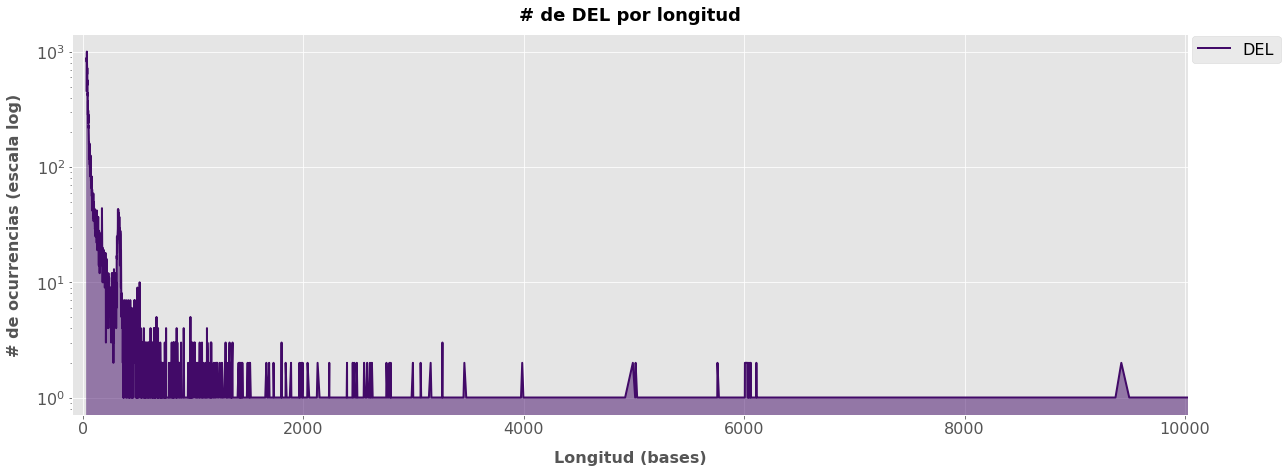

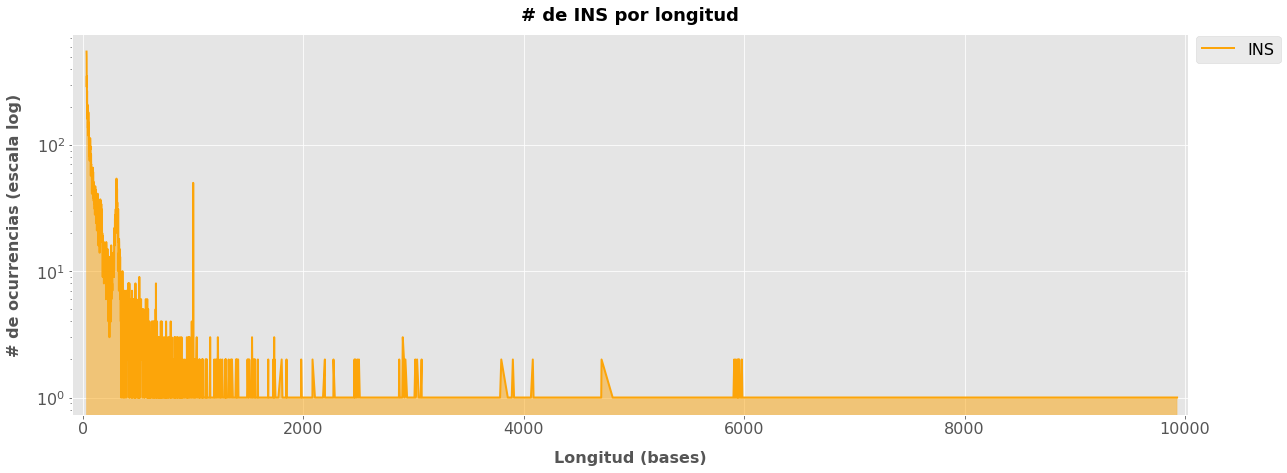

In [43]:
INS_DEL_n_37 = hf.INS_DEL_length_count_plot(n_variants_37_df_mod, "nanopore")

In [44]:
i_variants_37_bwa = []
with gzip.open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/results/variants/somatic.indels.vcf.gz",
               "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[1]):
            if "#" in line.decode('utf-8')[0]:
                i_variants_37_bwa.append(line.decode('utf-8')[1:].strip().split())
            else:
                i_variants_37_bwa.append(line.decode('utf-8').strip().split())
                
i_variants_37_bwa_df = pd.DataFrame(i_variants_37_bwa[1:], columns = i_variants_37_bwa[0])
i_variants_37_bwa_df

CHROM      POS ID        REF               ALT QUAL  \
0       NC_000001.10   535542  .    GCCATTT                 G    .   
1       NC_000001.10   535552  .          C  CTTTTATTGAAATAAA    .   
2       NC_000001.10   536609  .          C           CTACCCA    .   
3       NC_000001.10   537424  .         AC                 A    .   
4       NC_000001.10   547009  .        GGT                 G    .   
...              ...      ... ..        ...               ...  ...   
128973   NT_113891.2  1840912  .        TAC                 T    .   
128974   NT_167249.1   107269  .  TATATATGG                 T    .   
128975   NT_167249.1  2729832  .          C               CTA    .   
128976   NT_167251.1   112019  .        ATG                 A    .   
128977   NC_012920.1    12417  .          C                CA    .   

                  FILTER                                               INFO  \
0                 LowEVS  SOMATIC;QSI=27;TQSI=2;NT=ref;QSI_NT=27;TQSI_NT...   
1                 LowEVS  SOMATIC;QSI=15;TQSI=2;NT=ref;QSI_NT=15;TQSI_NT...   
2                 LowEVS  SOMATIC;QSI=22;TQSI=2;NT=ref;QSI_NT=22;TQSI_NT...   
3                 LowEVS  SOMATIC;QSI=6;TQSI=1;NT=ref;QSI_NT=6;TQSI_NT=1...   
4                 LowEVS  SOMATIC;QSI=13;TQSI=1;NT=ref;QSI_NT=13;TQSI_NT...   
...                  ...                                                ...   
128973            LowEVS  SOMATIC;QSI=1;TQSI=2;NT=ref;QSI_NT=1;TQSI_NT=2...   
128974            LowEVS  SOMATIC;QSI=12;TQSI=2;NT=ref;QSI_NT=12;TQSI_NT...   
128975  HighDepth;LowEVS  SOMATIC;QSI=3;TQSI=2;NT=ref;QSI_NT=3;TQSI_NT=2...   
128976            LowEVS  SOMATIC;QSI=1;TQSI=1;NT=hom;QSI_NT=1;TQSI_NT=1...   
128977              PASS  SOMATIC;QSI=3070;TQSI=1;NT=ref;QSI_NT=3070;TQS...   

                                             FORMAT  \
0       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
2       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
3       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
4       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                             ...   
128973  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128974  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128975  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128976  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128977  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                   NORMAL  \
0                56:56:51,84:5,9:2,0:54.45:1.22:0.00:0.02   
1               55:55:48,79:6,11:2,0:56.17:1.19:0.00:0.02   
2              55:55:45,136:4,12:1,1:60.09:0.47:0.00:0.00   
3                28:28:22,52:3,7:4,0:26.57:0.83:0.00:0.00   
4             23:23:19,133:1,21:3,13:22.75:0.37:0.00:0.00   
...                                                   ...   
128973        59:59:46,62:2,3:16,11:58.28:11.84:0.00:0.19   
128974           22:22:21,36:0,4:6,8:25.61:3.44:0.00:0.12   
128975         43:43:31,77:4,12:9,49:39.28:4.45:0.00:0.10   
128976           29:29:0,0:29,35:0,1:26.07:1.85:0.00:0.04   
128977  20074:20074:18104,19235:32,52:1975,1268:20022....   

                                                    TUMOR  
0                 15:15:9,30:6,9:1,0:14.69:0.74:0.00:0.00  
1                 16:16:9,30:6,9:1,1:14.85:0.77:0.00:0.00  
2                    6:6:3,34:2,8:1,1:7.11:0.19:0.00:0.00  
3                16:16:11,20:5,9:0,0:14.26:0.00:0.00:0.00  
4                11:11:7,54:3,24:1,7:11.00:0.79:0.00:0.00  
...                                                   ...  
128973        76:76:54,66:5,8:20,17:67.96:11.27:0.00:0.16  
128974          25:25:23,40:4,8:7,21:31.23:2.63:0.00:0.06  
128975        53:53:35,81:7,22:13,63:47.27:6.38:0.00:0.13  
128976           14:14:2,3:12,16:0,0:12.09:0.85:0.00:0.00  
128977  12970:12970:8547,9088:2631,2817:1789,1275:1295...  

[128978 rows x 11 columns]

In [45]:
i_variants_37_bwa_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                             i_variants_37_bwa_df)
i_variants_37_bwa_df_mod = hf.RM_illumina_df_parser(i_variants_37_bwa_df_mod)
i_variants_37_bwa_df_mod

CHROM  variant_begin  variant_end          REF    ALT  SV_length  \
0       chr1           4357         4361            G  GAGAA          4   
1       chr1           5952         5953            T     TG          1   
2       chr1           6765         6766            T     TG          1   
3       chr1           8016         8020        GATTT      G         -4   
4       chr1           8282         8292  CTCTTTCTCTT      C        -10   
...      ...            ...          ...          ...    ...        ...   
128973  chrY       59002610     59002611            A     AG          1   
128974  chrY       59009151     59009152            G     GA          1   
128975  chrY       59024400     59024402            G    GCA          2   
128976  chrY       59027141     59027142           TA      T         -1   
128977  chrY       59030585     59030587            T    TAA          2   

       SV_type  
0          INS  
1          INS  
2          INS  
3          DEL  
4          DEL  
...        ...  
128973     INS  
128974     INS  
128975     INS  
128976     DEL  
128977     INS  

[128978 rows x 7 columns]

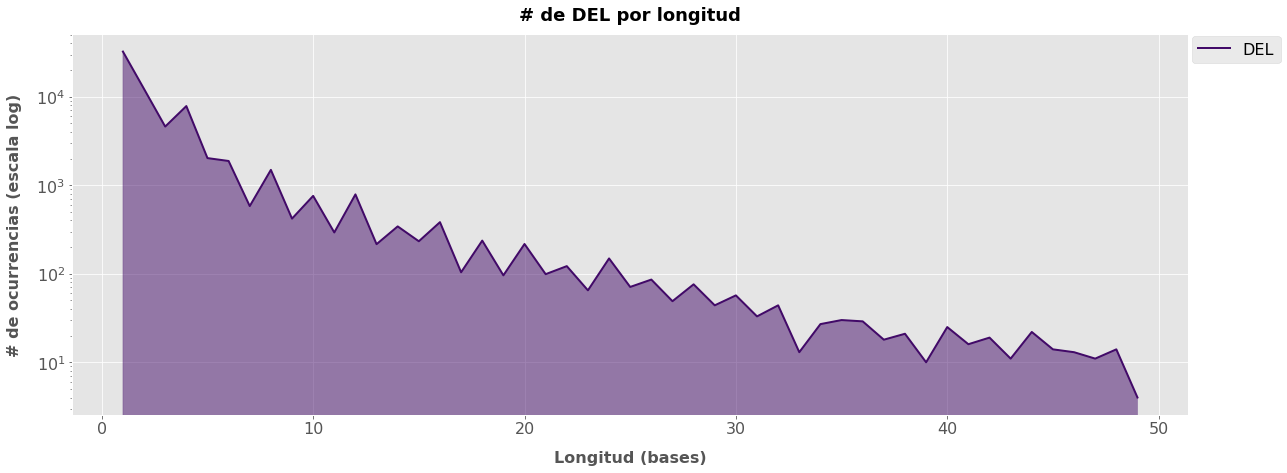

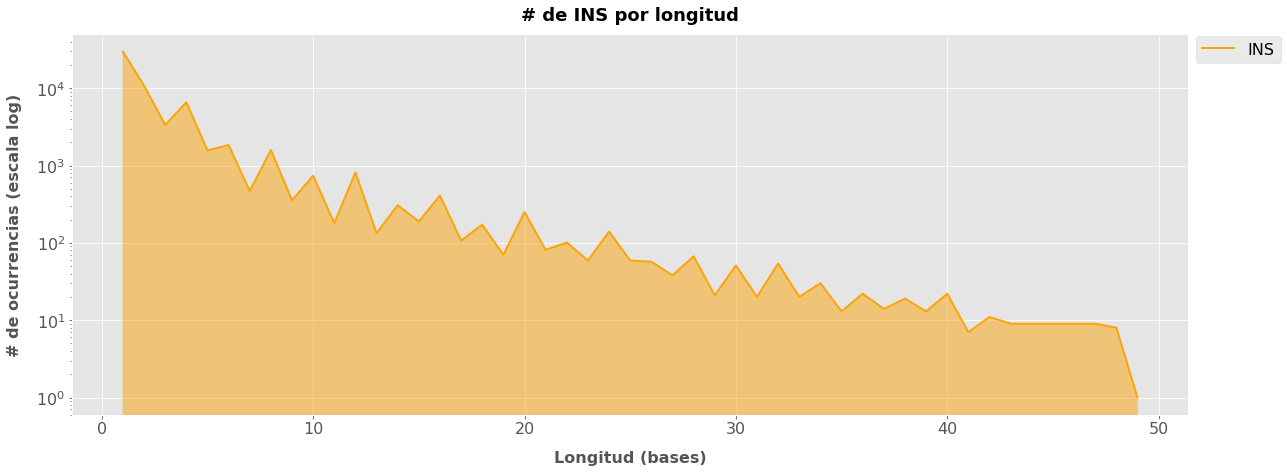

In [46]:
INS_DEL_i_37 = hf.INS_DEL_length_count_plot(i_variants_37_bwa_df_mod, "illumina")

In [47]:
i_variants_37_bwa_f_df = i_variants_37_bwa_df.iloc[list((i_variants_37_bwa_df.FILTER == "PASS") |
                                                        (i_variants_37_bwa_df.FILTER.str.contains("HighDepth")))]
i_variants_37_bwa_f_df = i_variants_37_bwa_f_df.iloc[list(i_variants_37_bwa_f_df.FILTER.str.contains("LowDepth") == False)]
i_variants_37_bwa_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                               i_variants_37_bwa_f_df,
                                               unlocalized = True,
                                               remove = True)
i_variants_37_bwa_f_df_mod = hf.RM_illumina_df_parser(i_variants_37_bwa_f_df_mod)
i_variants_37_bwa_f_df_mod

CHROM  variant_begin  variant_end     REF  ALT  SV_length SV_type
0     chr1           6765         6766       T   TG          1     INS
1     chr1         127378       127381    CTCA    C         -3     DEL
2     chr1         127434       127437    CTCA    C         -3     DEL
3     chr1         129147       129148       A   AT          1     INS
4     chr1         130075       130079   CATTT    C         -4     DEL
...    ...            ...          ...     ...  ...        ...     ...
1406  chrY       28810857     28810862  ATAGAG    A         -5     DEL
1407  chrY       28812939     28812940       G   GT          1     INS
1408  chrY       58996106     58996107      AC    A         -1     DEL
1409  chrY       59024400     59024402       G  GCA          2     INS
1410  chrY       59030585     59030587       T  TAA          2     INS

[1411 rows x 7 columns]

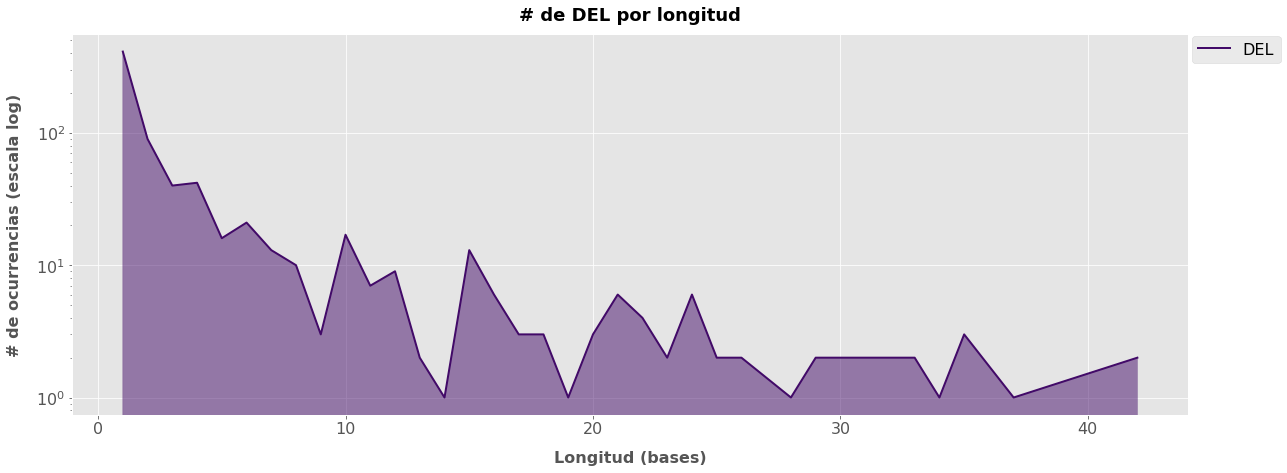

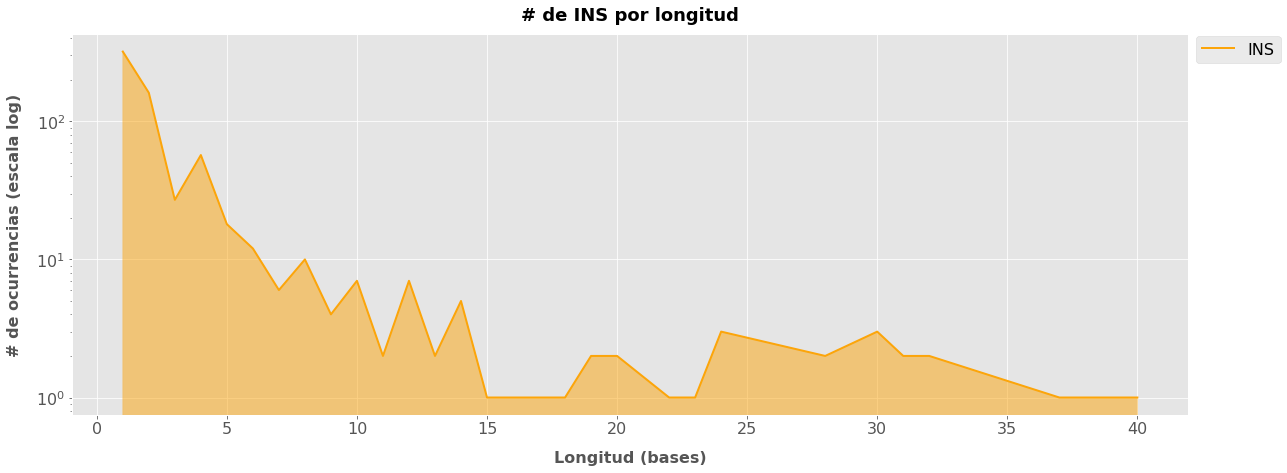

In [48]:
INS_DEL_i_37_f = hf.INS_DEL_length_count_plot(i_variants_37_bwa_f_df_mod, "illumina")

In [49]:
manta_37_bwa = []
with gzip.open(f"{outdir}/illumina/sv_calling/manta/GRCh37_bwa/results/variants/candidateSV.vcf.gz",
               "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[1]):
            if "#" in line.decode('utf-8')[0]:
                manta_37_bwa.append(line.decode('utf-8')[1:].strip().split())
            else:
                manta_37_bwa.append(line.decode('utf-8').strip().split())
                
manta_37_bwa_df = pd.DataFrame(manta_37_bwa[1:], columns = manta_37_bwa[0])
manta_37_bwa_df

CHROM    POS                                ID             REF  \
0       NC_000001.10  16742              MantaINS:3:0:0:0:0:0               G   
1       NC_000001.10  50481              MantaINS:0:0:0:0:0:0               G   
2       NC_000001.10  66184            MantaBND:1:0:1:1:0:0:0               C   
3       NC_000001.10  66365              MantaINS:1:0:0:1:1:0  AATATAATATATAA   
4       NC_000001.10  66365              MantaINS:1:0:0:3:1:0  AATATAATATATAA   
...              ...    ...                               ...             ...   
143139   NC_012920.1  11458  MantaBND:1:122175:122175:3:0:0:1               A   
143140   NC_012920.1  12106   MantaINS:1:122175:122175:12:2:0               C   
143141   NC_012920.1  12232  MantaBND:1:122175:122175:0:0:0:1               T   
143142   NC_012920.1  12245  MantaBND:1:122175:122175:0:0:0:0               T   
143143   NC_012920.1  12837   MantaINS:1:122175:122175:18:6:0               A   

                                                      ALT QUAL FILTER  \
0                                              GTGGTGGTGC    .      .   
1                                               GGTGTGTGT    .      .   
2                                   ]NC_000019.9:108016]C    .      .   
3       ATATATATATTATTATATAATATATATTATATAATATATTTTATTA...    .      .   
4       ATATATATATTATTATATAATATATATTATATAATATATTTTATTA...    .      .   
...                                                   ...  ...    ...   
143139                               [NC_012920.1:11452[A    .      .   
143140  CAACCCCGACATCATTACCGGGTTTTCCTCTTGTAAATATAGTTTA...    .      .   
143141                               T]NC_012920.1:12245]    .      .   
143142                               T]NC_012920.1:12232]    .      .   
143143  AGCCATTCAAGCAATCCTATACAACCGATATCGCCGATACGGTTGT...    .      .   

                                                     INFO  
0       END=16742;SVTYPE=INS;SVLEN=9;CIGAR=1M9I;CIPOS=...  
1       END=50481;SVTYPE=INS;SVLEN=8;CIGAR=1M8I;CIPOS=...  
2       SVTYPE=BND;MATEID=MantaBND:1:0:1:1:0:0:1;IMPRE...  
3       END=66378;SVTYPE=INS;SVLEN=142;CIGAR=1M142I13D...  
4       END=66378;SVTYPE=INS;SVLEN=142;CIGAR=1M142I13D...  
...                                                   ...  
143139  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:3:0...  
143140  END=12106;SVTYPE=INS;SVLEN=102;CIGAR=1M102I;CI...  
143141  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:0:0...  
143142  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:0:0...  
143143  END=12837;SVTYPE=INS;SVLEN=80;CIGAR=1M80I;CIPO...  

[143144 rows x 8 columns]

In [50]:
manta_37_bwa_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                        manta_37_bwa_df)
manta_37_bwa_df_mod = hf.RM_illumina_df_parser(manta_37_bwa_df_mod)
manta_37_bwa_df_mod

CHROM  variant_begin  variant_end  \
0       chr1            694         1094   
1       chr1            694         1094   
2       chr1           8282         8292   
3       chr1           8282         8292   
4       chr1          10199        10707   
...      ...            ...          ...   
143139  chrY       59031267     59031283   
143140  chrY       59031755     59031765   
143141  chrY       59031755     59031765   
143142  chrY       59032251     59032291   
143143  chrY       59033284     59033308   

                                                      REF  \
0       CAATCATCATCGAATGGAATCGAATGGAATCATCGAATGGACTCGA...   
1       CAATCATCATCGAATGGAATCGAATGGAATCATCGAATGGACTCGA...   
2                                             CTCTTTCTCTT   
3                                             CTCTTTCTCTT   
4       GAGAAAAATGATGGAAGTCCGAAGGAGTCATCACTAGGTGCTTTGT...   
...                                                   ...   
143139                                 AGTCTTCCTCATAACCAA   
143140                                        TATCTCTATTC   
143141                                        TATCTCTATTC   
143142                                               AAAC   
143143                                                  T   

                                                 ALT  SV_length SV_type  
0                                                  C       -400     DEL  
1                                                  C       -400     DEL  
2                                                  C        -10     DEL  
3                                                  C        -10     DEL  
4                                                  G       -508     DEL  
...                                              ...        ...     ...  
143139                                            AT        -16     DEL  
143140                                             T        -10     DEL  
143141                                             T        -10     DEL  
143142  ACAAACAAACAAACAAACAAACAAACAACAACAAAAAAAACCTT         40     INS  
143143                     T]NC_000010.10:127586261]         24     INS  

[143144 rows x 7 columns]

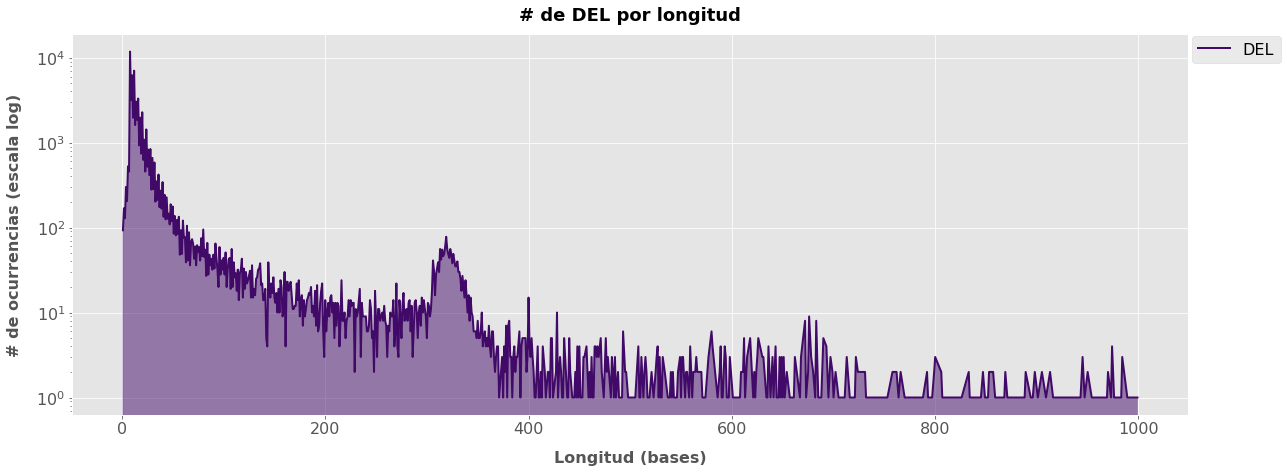

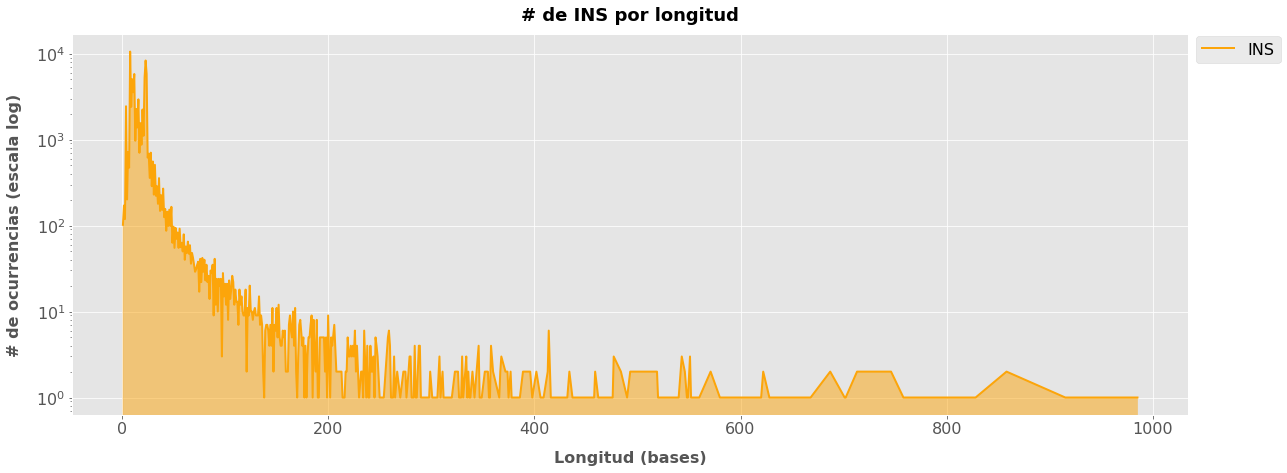

In [51]:
INS_DEL_manta_37 = hf.INS_DEL_length_count_plot(manta_37_bwa_df_mod, "illumina")

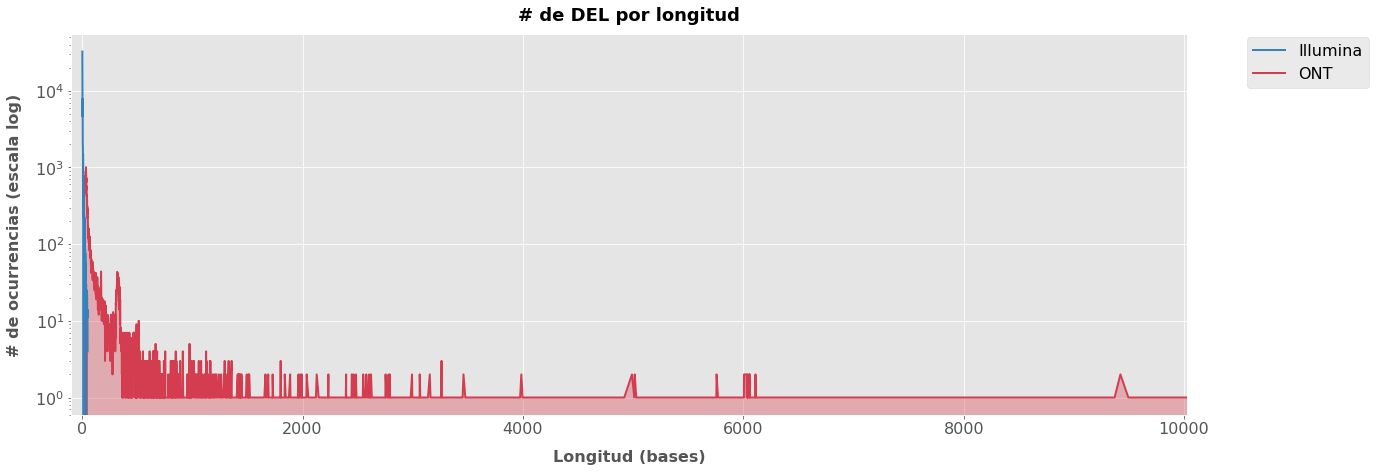

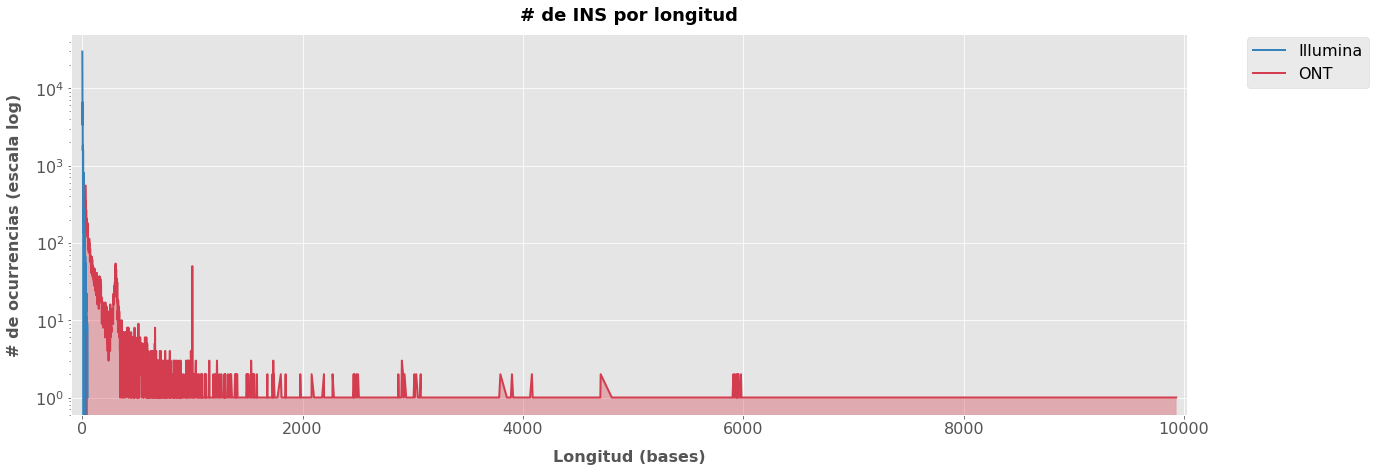

In [52]:
INS_DEL_dict = hf.INS_DEL_profiles(i_variants_37_bwa_df_mod, n_variants_37_df_mod)

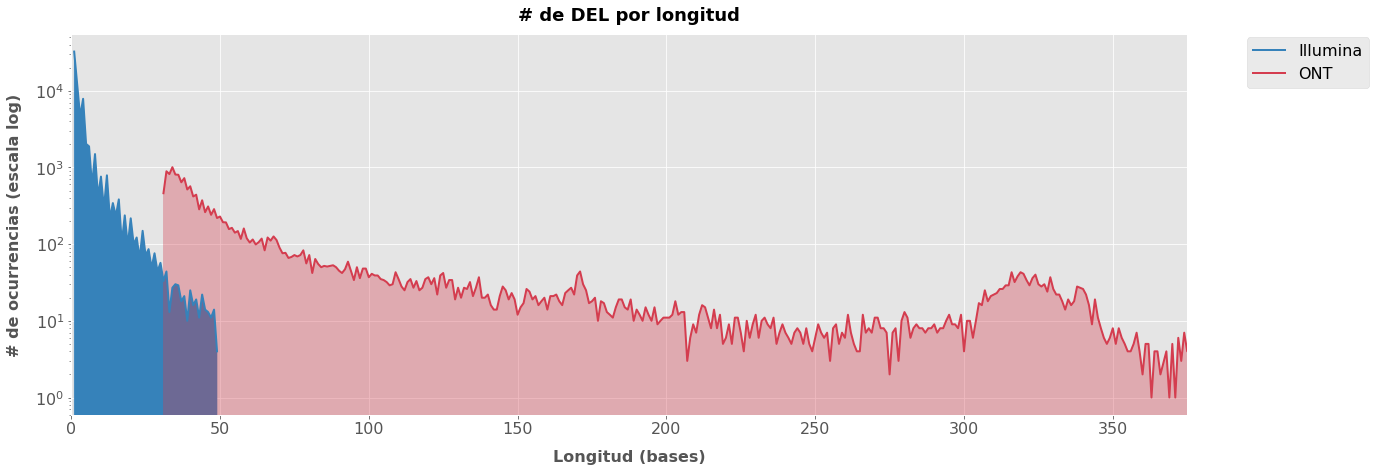

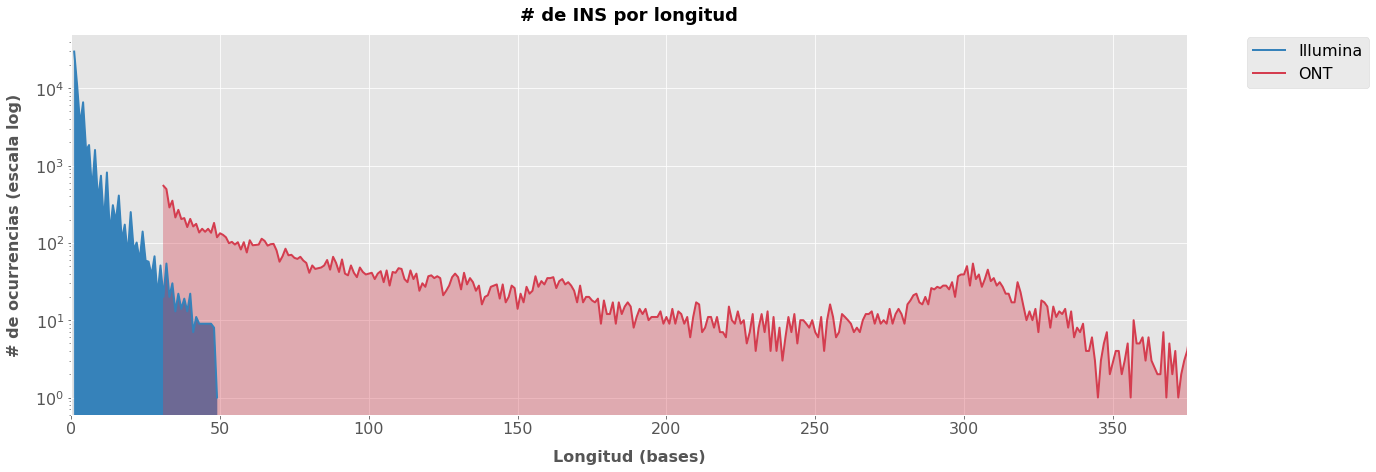

In [53]:
_ = hf.INS_DEL_profiles(i_variants_37_bwa_df_mod, n_variants_37_df_mod, zoom = True)

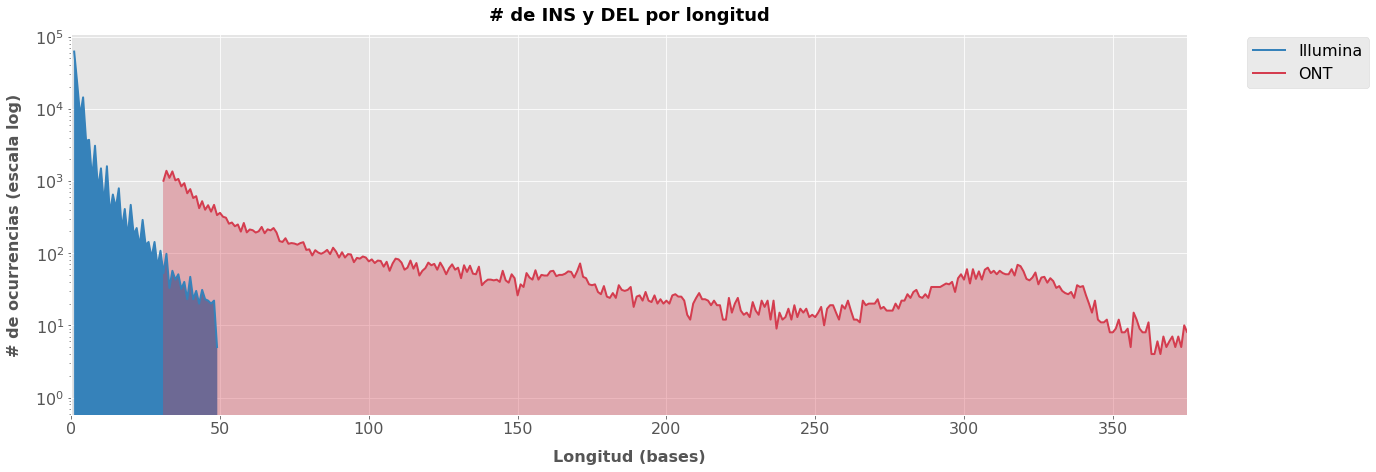

In [54]:
_ = hf.INS_DEL_profiles(i_variants_37_bwa_df_mod, n_variants_37_df_mod, not_sep = True, zoom = True)

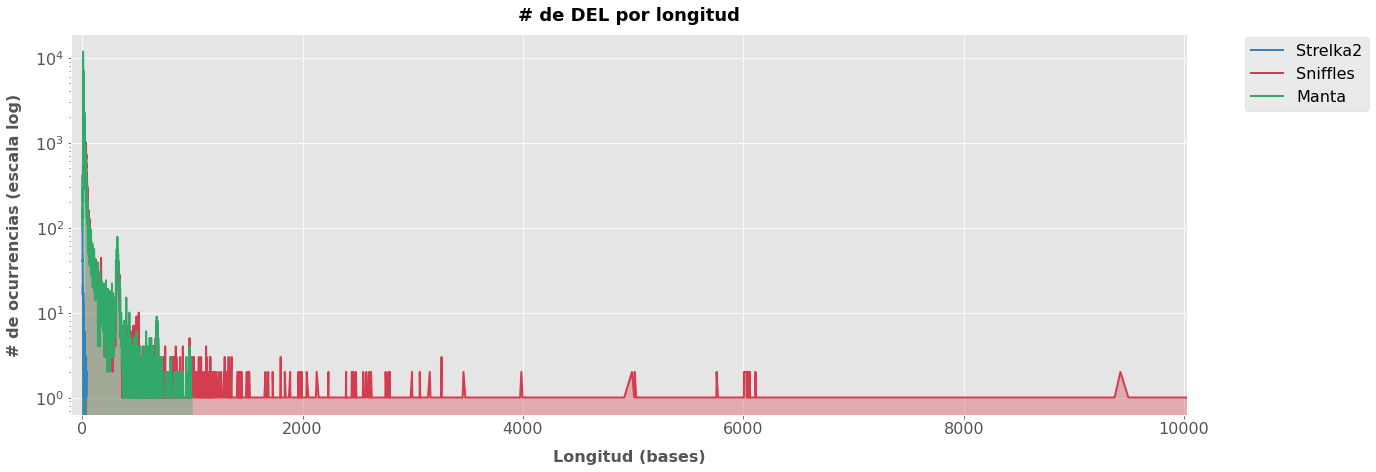

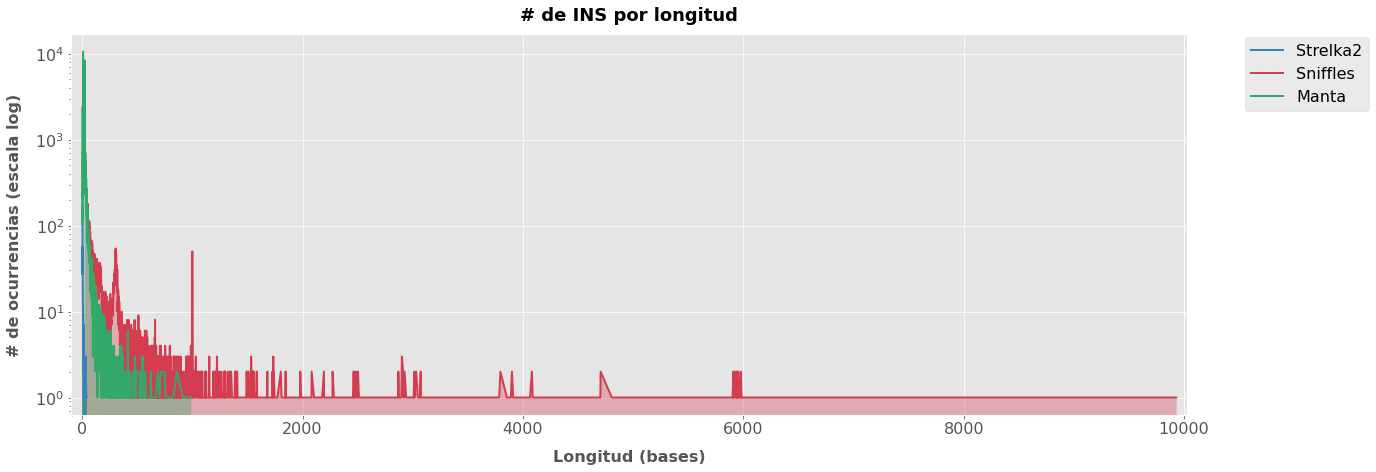

In [55]:
_ = hf.INS_DEL_profiles_three(i_variants_37_bwa_f_df_mod, n_variants_37_df_mod, manta_37_bwa_df_mod, zoom = False)

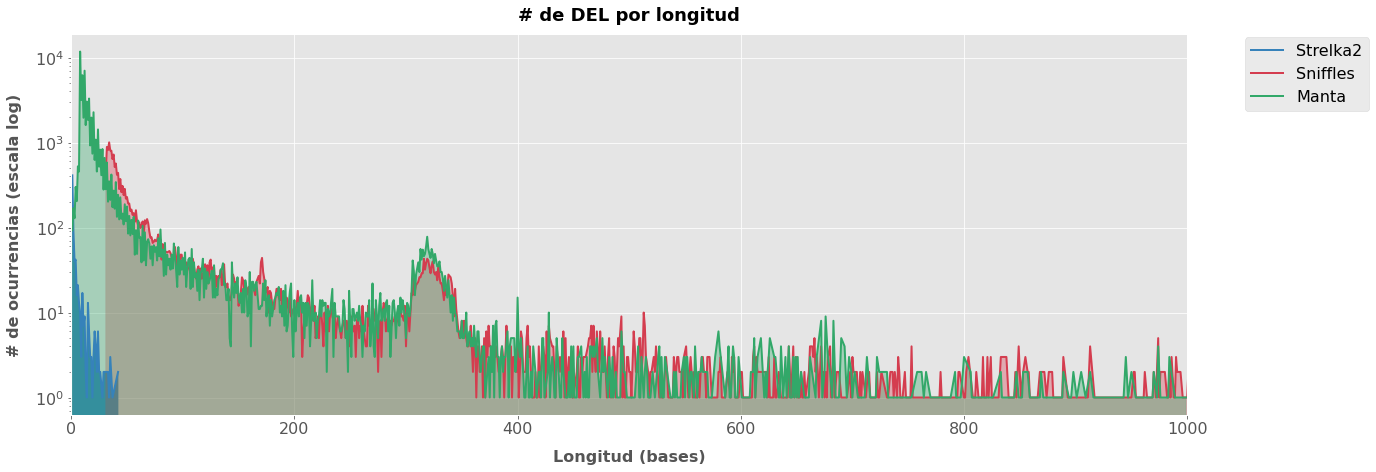

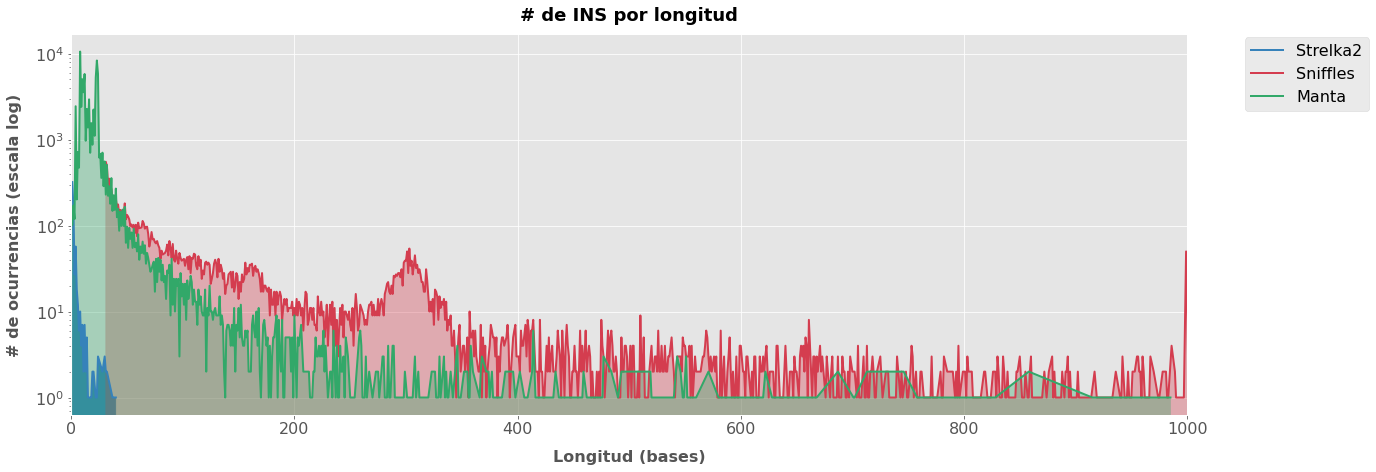

In [56]:
_ = hf.INS_DEL_profiles_three(i_variants_37_bwa_f_df_mod, n_variants_37_df_mod, manta_37_bwa_df_mod, zoom = True,
                              zoom_range = [0, 1000])

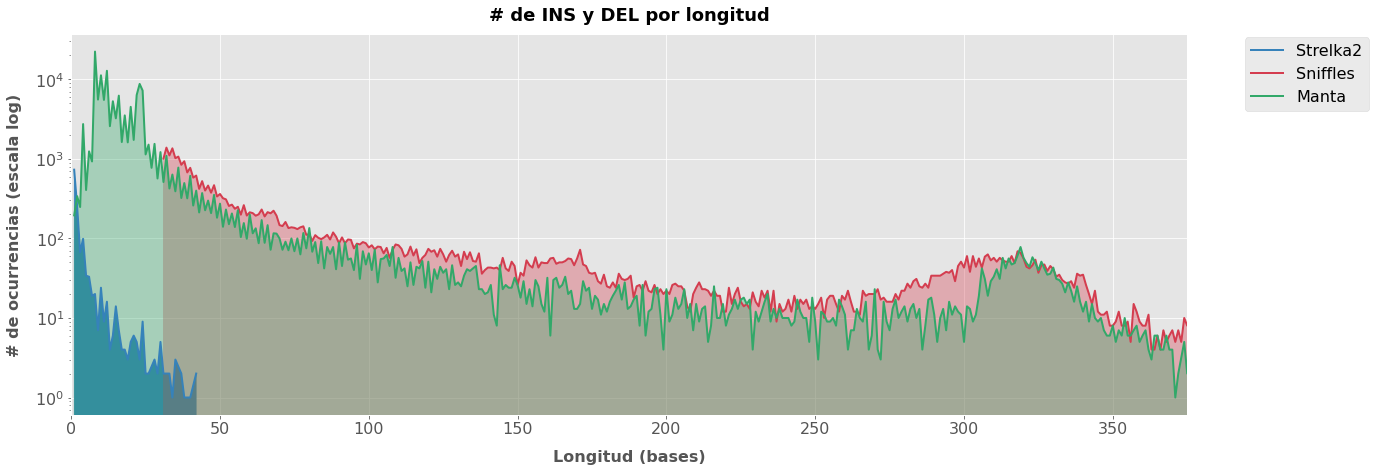

In [57]:
_ = hf.INS_DEL_profiles_three(i_variants_37_bwa_f_df_mod, n_variants_37_df_mod, manta_37_bwa_df_mod,
                              not_sep = True, zoom = True)